# Proyecto Final Bienes Raices Mexico 2013-2016

## Librerias

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import stylecloud
from PIL import Image
import unicodedata
import re
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk import FreqDist
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Funciones

In [2]:
##### Renombrar Variables
def renombrar_variables(lista_variables, tipo_variables):
    """ renombrar_variables(lista_variables, tipo_variables) -> {variable_original : variable con prefijo}
    Recibe una lista con el nombre de las variables de un sólo tipo
    y regresa un diccionario que tiene como llave el nombre de la 
    variable original y como valor el nombre de la variable con el 
    prefijo del tipo de variable indicada
    
    tipo_variables: 'continua', 'discreta', 'fecha', 'texto'
    """
    try:
        if type(lista_variables) != list:
            print('Se debe introducir una lista no vacia con el nombre de las variables')
        else:
            if tipo_variables not in ['continua', 'discreta', 'fecha', 'texto']:
                print('tipo_variable debe se alguna de las siguientes opciones \n "continua", "discreta", "fecha", "texto"')
            else:
                # Se elige el tipo de variable
                if tipo_variables == 'continua':
                    pref = 'c'
                elif tipo_variables == 'discreta':
                    pref = 'v'
                elif tipo_variables == 'fecha':
                    pref = 'd'
                elif tipo_variables == 'texto':
                    pref = 't'
    
                # Se junta el prefijo de la variable con espacio, luego los espacios se cambian por _
                nuevas = map(lambda x: (' '.join((pref , x))).replace(' ', '_'), lista_variables)
                
                #Diccionario final
                return dict(zip(lista_variables, nuevas))
            
    except:
        print('Se debe introducir una lista con valores no repetidos')

###### Limpieza de Texto

def limp_texto(Serie):
    # Lista de texto limpia
    clean_t = []

    # entrar en cada texto y eliminar mayusculas o caracteres especiales
    for text in Serie:
        aux1 = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
        aux2 = re.sub("[^a-zA-Z0-9 ]", " ", aux1.decode("utf-8"), flags=re.UNICODE)
        aux3 = u' '.join(aux2.lower().split())
        clean_t.append(aux3)
    
    return clean_t

# Grafica de Pie
def Pie(labels, values, title, path):
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])
    fig.update_layout(title_text=title)
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    if path != False:
        fig.write_image(path, scale = 1.5)
    fig.show()
    
# grafica de barras
def Bar(etiquetas, valores, titulo, path, color = 'blue'):
    fig = go.Figure(data=[go.Bar(x=etiquetas, y=valores, text=valores, marker_color=color)])
    fig.update_layout(title_text=titulo)
    fig.update_traces(textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    if path != False:
        fig.write_image(path, scale = 1.5)
    fig.show()
    
# grafica de lineas
def Line(etiquetas, valores, titulo, path, color = 'blue'):
    fig = go.Figure(data=[go.Scatter(x=etiquetas, y=valores, text=valores, marker_color=color)])
    fig.update_layout(title_text=titulo)
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    if path != False:
        fig.write_image(path, scale = 1.5)
    fig.show()
    
# boxplot
def Box(data, titulo, path, color = 'blue'):
    fig = go.Figure(data=[go.Box(y=data, marker_color=color)])
    fig.update_layout(title_text=titulo)
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    if path != False:
        fig.write_image(path, scale = 1.5)
    fig.show()

    
### Creacion de nube de palabras
def word_cloud(texto, path_texto, path_imagen):
    # CReacion de .txt
    with open(path_texto,"w") as f:
        for text in texto:
            f.write(str(text + ' '))
    f.close()

    # paths
    path_texto=path_texto
    path_imagen=path_imagen

    stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen)
    # mostrar imagen
    return Image.open(path_imagen)

## HIstogramas
def Histograma(data, bins, log, xlabel, titulo, path, color = 'blue'):
    #tamaño
    plt.figure(figsize=(10, 7))
    #histograma
    plt.hist(data, bins = bins, log = log, color = color)
    #xlabel
    plt.xlabel(xlabel)
    #titulo
    plt.title(titulo)
    #salvar imagen
    if path != False:
        plt.savefig(path, dpi = 200)
    
    return plt.show()

def Box(data, xlabel, titulo, path):
    plt.figure(figsize = (10, 7))
    #grafica de caja
    plt.boxplot(data)
    #xlabel
    plt.xlabel(xlabel)
    #titulo
    plt.title(titulo)
    #salvar imagen
    if path != False:
        plt.savefig(path, dpi = 200)
    
    return plt.show()

# fuera de la naturaleza de los datos
def out_nature(df, column, tipo):
    # guardar indices
    aux = []
    # tipo de variable
    if tipo == 'alpha':
        # solo valores no nulos
        for i in df.loc[:, column].dropna().index:
            # prueba alfabética
            if not df.loc[i, column].isalpha():
                aux.append(i)
                
    elif tipo == 'digit':
        # solo valores no nulos
        for i in df.loc[:, column].dropna().index:
            # prueba numérica
            try:
                float(df.loc[i, column])
            except:
                aux.append(i)
    # lista de índices diferentes        
    return aux

## Importar Datos de Ventas y Rentas de Bienes Raices en Mexico de 2013 a 2016

In [3]:
# Se utiliza el 'latin' encoding ya que contiene descripciones de los inmuebles
data = pd.read_csv('real_estate_mex_2013_2016.csv', encoding = 'latin')
data.head()

created_on operation property_type           place_name  \
0  19/09/2013      sell     apartment  Nuevo Centro Urbano   
1  19/09/2013      sell     apartment  Nuevo Centro Urbano   
2  19/09/2013      sell     apartment  Nuevo Centro Urbano   
3  19/09/2013      sell     apartment     Playa del Carmen   
4  19/09/2013      sell     apartment  Nuevo Centro Urbano   

                             place_with_parent_names  geonames_id  \
0  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...          NaN   
1  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...          NaN   
2  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...          NaN   
3  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...          NaN   
4  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...          NaN   

                lat-lon        lat        lon     price  ...  \
0  20.627527,-87.076686  20.627527 -87.076686  269000.0  ...   
1  20.627567,-87.076718  20.627567 -87.076718  230000.0  ...   
2    20.6267,-87.075866  20.626700 -87.075866  135000.0  ...   
3  20.635482,-87.070345  20.635482 -87.070345  185000.0  ...   
4  20.629092,-87.074658  20.629092 -87.074658  180000.0  ...   

  surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                 110.0       2445.454545   2445.454545    NaN    NaN   
1                 110.0       2090.909091   2090.909091    NaN    NaN   
2                  41.0       3292.682927   3292.682927    NaN    NaN   
3                 122.0       1516.393443   1516.393443    NaN    NaN   
4                   NaN               NaN           NaN    NaN    NaN   

   expenses                                      properati_url  \
0       NaN  http://nuevo-centro-urbano.properati.com.mx/o6...   
1       NaN  http://nuevo-centro-urbano.properati.com.mx/o8...   
2       NaN  http://nuevo-centro-urbano.properati.com.mx/o9...   
3       NaN  http://playa-del-carmen-playa-del-carmen.prope...   
4       NaN  http://nuevo-centro-urbano.properati.com.mx/ok...   

                                         description  \
0  Referencia #28010. En el centro de Playa del C...   
1  Referencia #28925. En el centro de Playa del C...   
2  Referencia #29031. La Papaya un proyecto altam...   
3  Referencia #29032. Visite las nuevas Acqua Ter...   
4  Referencia #33970. TodavÃ­a tenemos algunas un...   

                                               title  \
0  Departamento en Venta. Ref. #28010. 3 Dormitor...   
1  Departamento en Venta. Ref. #28925. 3 Dormitor...   
2  Departamento en Venta. Ref. #29031. 1 Dormitor...   
3  Departamento en Venta. Ref. #29032. 2 Dormitor...   
4  Departamento en Venta. Ref. #33970. Encanto Ri...   

                                     image_thumbnail  
0  https://thumbs-cf.properati.com/3/q4Ws9xQT8Yu3...  
1  https://thumbs-cf.properati.com/8/7W4OI5hIXPdY...  
2  https://thumbs-cf.properati.com/0/4h1_ZbVNWly0...  
3  https://thumbs-cf.properati.com/0/Mxv1JulyoQBM...  
4  https://thumbs-cf.properati.com/9/jzkZFLJUFVEw...  

[5 rows x 24 columns]

## Analisis de Tabla de Datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188525 entries, 0 to 188524
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  188525 non-null  object 
 1   operation                   188525 non-null  object 
 2   property_type               188525 non-null  object 
 3   place_name                  188525 non-null  object 
 4   place_with_parent_names     188525 non-null  object 
 5   geonames_id                 1 non-null       float64
 6   lat-lon                     156591 non-null  object 
 7   lat                         156591 non-null  float64
 8   lon                         156591 non-null  float64
 9   price                       185911 non-null  float64
 10  currency                    185911 non-null  object 
 11  price_aprox_local_currency  185911 non-null  float64
 12  price_aprox_usd             185911 non-null  float64
 13  surface_total_

_Observamos que existen 188,525 registros en total, con variables como fechas, tipo de operaciones, tipo de propiedad, nombre del lugar, descripción más detallada del lugar, variables geograficas, precio, moneda, superficie, piso, numero de habitaciones, descripciones, etc._

## Datos Nulos por Variable

In [5]:
# Suma de Nulos por variable
nulos = pd.DataFrame(data.isnull().sum(), columns = ['Nulos'])
# Agrega porcentaje de nulos con respecto al total de registros
nulos['%_Nulos'] = round(nulos['Nulos']/data.shape[0] * 100, 2).values
nulos

Nulos  %_Nulos
created_on                       0     0.00
operation                        0     0.00
property_type                    0     0.00
place_name                       0     0.00
place_with_parent_names          0     0.00
geonames_id                 188524   100.00
lat-lon                      31934    16.94
lat                          31934    16.94
lon                          31934    16.94
price                         2614     1.39
currency                      2614     1.39
price_aprox_local_currency    2614     1.39
price_aprox_usd               2614     1.39
surface_total_in_m2          90894    48.21
surface_covered_in_m2         7443     3.95
price_usd_per_m2            110834    58.79
price_per_m2                 21170    11.23
floor                       159810    84.77
rooms                       182449    96.78
expenses                    188318    99.89
properati_url                    0     0.00
description                      0     0.00
title                            0     0.00
image_thumbnail               5522     2.93

_Algunas variables como geonames_id que tiene un solo dato o expense con 207 datos seran eliminados ya que contienen mas del 90% de información nula_

## Eliminar Variables con un Porcentaje Mayor del 50% de Informacion Nula

In [6]:
# Nombres de columnas mayores con más del 50% de nulos
col_null = nulos[nulos['%_Nulos'] > 50].index

# Eliminar dichas columnas del data frame original
df = data.drop(col_null, axis = 1)

# Porcentaje de Nulos
round(df.isnull().sum()/df.shape[0] * 100, 2)

created_on                     0.00
operation                      0.00
property_type                  0.00
place_name                     0.00
place_with_parent_names        0.00
lat-lon                       16.94
lat                           16.94
lon                           16.94
price                          1.39
currency                       1.39
price_aprox_local_currency     1.39
price_aprox_usd                1.39
surface_total_in_m2           48.21
surface_covered_in_m2          3.95
price_per_m2                  11.23
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.93
dtype: float64

## Analisis y Separación de la Variable place_with_parent_names

In [7]:
df['place_with_parent_names'][0]

'|MÃ©xico|Quintana Roo|Solidaridad|Playa del Carmen|Nuevo Centro Urbano|'

_En la mayoria de los casos los nombres se dividen en país, estados, municipio y colonia_

In [8]:
# Número de Registros en la mayoría de los casos
df['place_with_parent_names'].map(lambda x: len(x.split('|')[1:])).value_counts()

4    139874
5     35146
6      8989
3      4516
Name: place_with_parent_names, dtype: int64

_Se utilizaran los 4 primeros datos en cada uno de los registros, al ser un a analisis de Mexico se eliminaran las columnas con distintos pais, la columna pais sera eliminada_

In [9]:
pais = df['place_with_parent_names'].map(lambda x: x.split('|')[1])
estado = df['place_with_parent_names'].map(lambda x: x.split('|')[2])
municipio = df['place_with_parent_names'].map(lambda x: x.split('|')[3])
colonia = df['place_with_parent_names'].map(lambda x: x.split('|')[4:])

In [10]:
# Relleno de Nan
for i in range(len(colonia)):
    try:
        # Si la colonia es vacia
        if colonia[i][0] == '':
            colonia[i][0] = np.nan
    except:
        # Si no existe la colina
        colonia[i].append(np.nan)

In [11]:
# Solo un elemento
colonia = colonia.map(lambda x: x[0])

In [12]:
# Agregar nuevos elementos al data frame
df['pais'] = pais
df['estado'] = estado
df['municipio'] = municipio
df['colonia'] = colonia

In [13]:
df.head()

created_on operation property_type           place_name  \
0  19/09/2013      sell     apartment  Nuevo Centro Urbano   
1  19/09/2013      sell     apartment  Nuevo Centro Urbano   
2  19/09/2013      sell     apartment  Nuevo Centro Urbano   
3  19/09/2013      sell     apartment     Playa del Carmen   
4  19/09/2013      sell     apartment  Nuevo Centro Urbano   

                             place_with_parent_names               lat-lon  \
0  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...  20.627527,-87.076686   
1  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...  20.627567,-87.076718   
2  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...    20.6267,-87.075866   
3  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...  20.635482,-87.070345   
4  |MÃ©xico|Quintana Roo|Solidaridad|Playa del Ca...  20.629092,-87.074658   

         lat        lon     price currency  ...  surface_covered_in_m2  \
0  20.627527 -87.076686  269000.0      USD  ...                  110.0   
1  20.627567 -87.076718  230000.0      USD  ...                  110.0   
2  20.626700 -87.075866  135000.0      USD  ...                   41.0   
3  20.635482 -87.070345  185000.0      USD  ...                  122.0   
4  20.629092 -87.074658  180000.0      USD  ...                    NaN   

   price_per_m2                                      properati_url  \
0   2445.454545  http://nuevo-centro-urbano.properati.com.mx/o6...   
1   2090.909091  http://nuevo-centro-urbano.properati.com.mx/o8...   
2   3292.682927  http://nuevo-centro-urbano.properati.com.mx/o9...   
3   1516.393443  http://playa-del-carmen-playa-del-carmen.prope...   
4           NaN  http://nuevo-centro-urbano.properati.com.mx/ok...   

                                         description  \
0  Referencia #28010. En el centro de Playa del C...   
1  Referencia #28925. En el centro de Playa del C...   
2  Referencia #29031. La Papaya un proyecto altam...   
3  Referencia #29032. Visite las nuevas Acqua Ter...   
4  Referencia #33970. TodavÃ­a tenemos algunas un...   

                                               title  \
0  Departamento en Venta. Ref. #28010. 3 Dormitor...   
1  Departamento en Venta. Ref. #28925. 3 Dormitor...   
2  Departamento en Venta. Ref. #29031. 1 Dormitor...   
3  Departamento en Venta. Ref. #29032. 2 Dormitor...   
4  Departamento en Venta. Ref. #33970. Encanto Ri...   

                                     image_thumbnail     pais        estado  \
0  https://thumbs-cf.properati.com/3/q4Ws9xQT8Yu3...  MÃ©xico  Quintana Roo   
1  https://thumbs-cf.properati.com/8/7W4OI5hIXPdY...  MÃ©xico  Quintana Roo   
2  https://thumbs-cf.properati.com/0/4h1_ZbVNWly0...  MÃ©xico  Quintana Roo   
3  https://thumbs-cf.properati.com/0/Mxv1JulyoQBM...  MÃ©xico  Quintana Roo   
4  https://thumbs-cf.properati.com/9/jzkZFLJUFVEw...  MÃ©xico  Quintana Roo   

     municipio           colonia  
0  Solidaridad  Playa del Carmen  
1  Solidaridad  Playa del Carmen  
2  Solidaridad  Playa del Carmen  
3  Solidaridad  Playa del Carmen  
4  Solidaridad  Playa del Carmen  

[5 rows x 23 columns]

In [14]:
# Paises distitnos de Mexico
df['pais'].value_counts()

MÃ©xico                       188068
Brasil                           456
Estados Unidos de AmÃ©rica         1
Name: pais, dtype: int64

In [15]:
# Eliminar Paises distinto de Mexico
df = df[df['pais'] == 'MÃ©xico'].reset_index(drop = True)

# Eliminar Columna pais ya que todo son Mexico
df.drop(['pais'], axis = 1, inplace = True)
# Eliminar columna place_with_parent_names y place_name
df.drop(['place_with_parent_names', 'place_name'], axis = 1, inplace = True)

## Eliminar Variable lat-lon

_Esta variable sera eliminada ya que existen variables independientes con la misma información_

In [16]:
df.iloc[:, 3:5].isnull().sum()

lat-lon    31934
lat        31934
dtype: int64

_Observamos la misma cantidad de null en ambas variables, lo que indica que estan relacionadas_

In [17]:
# Elimnar lat-lon
df.drop(['lat-lon'], axis = 1, inplace = True)

## Cambio de Nombres de Variables

In [18]:
# Observamos el nombre de las variables
list(df.columns)

['created_on',
 'operation',
 'property_type',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_per_m2',
 'properati_url',
 'description',
 'title',
 'image_thumbnail',
 'estado',
 'municipio',
 'colonia']

In [19]:
continuas = ['lat', 'lon', 'price', 'price_aprox_local_currency', 'price_aprox_usd',
            'surface_total_in_m2', 'surface_covered_in_m2', 'price_per_m2']
discretas = ['operation', 'property_type', 'currency', 'estado', 'municipio', 'colonia']
fechas = ['created_on']
text = ['properati_url', 'description', 'title', 'image_thumbnail']

In [20]:
# Aplicación de función para cambio de nombre
n_continuas = renombrar_variables(continuas, 'continua')
n_discretas = renombrar_variables(discretas, 'discreta')
n_tiempo = renombrar_variables(fechas, 'fecha')
n_texto = renombrar_variables(text, 'texto')

In [21]:
# Renombrar variables
df.rename(columns = n_continuas, inplace = True)
df.rename(columns = n_discretas, inplace = True)
df.rename(columns = n_tiempo, inplace = True)
df.rename(columns = n_texto, inplace = True)

### Limpieza de  Texto

In [22]:
# Limpieza de texto
clean_t = limp_texto(df['t_description'])
# Separar cada palabra
clean_t_2 = []
for frase in clean_t:
    clean_t_2.append(frase.split(' '))

In [23]:
# Eliminar stop words de cada descripcion
stop = stopwords.words('spanish')
clean_f = []
for frase in clean_t_2:
    aux = []
    for w in frase:
        if w not in stop:
            aux.append(w)
    clean_f.append(aux)

In [24]:
# agregar la descripción limpia
df['t_description'] = [" ".join(x) for x in clean_f]

### Limpieza de Título

In [25]:
# Limpieza de texto
clean_t = limp_texto(df['t_title'])
# Separar cada palabra
clean_t_2 = []
for frase in clean_t:
    clean_t_2.append(frase.split(' '))

In [26]:
# Eliminar stop words de cada título
stop = stopwords.words('spanish')
clean_f = []
for frase in clean_t_2:
    aux = []
    for w in frase:
        if w not in stop:
            aux.append(w)
    clean_f.append(aux)

In [27]:
# agregar título limpio
df['t_title'] = [" ".join(x) for x in clean_f]

## Estadistica Descriptiva

In [28]:
df.describe(percentiles = [x / 10 for x in range(1, 10)])

c_lat          c_lon       c_price  \
count  156134.000000  156134.000000  1.854540e+05   
mean       21.034042     -99.013353  2.559722e+06   
std         2.973528       5.170212  6.038333e+06   
min        14.843818    -117.228632  5.000000e+01   
10%        18.917542    -103.438171  1.350000e+04   
20%        19.161508    -101.002460  1.550000e+05   
30%        19.367960    -100.356804  5.800000e+05   
40%        19.454332     -99.603079  9.500000e+05   
50%        20.124282     -99.227787  1.400000e+06   
60%        20.696542     -99.168088  1.880000e+06   
70%        21.039522     -98.979620  2.570554e+06   
80%        22.272659     -97.837900  3.567480e+06   
90%        25.643093     -89.636932  5.900000e+06   
max        41.577487      99.206936  9.450000e+08   

       c_price_aprox_local_currency  c_price_aprox_usd  c_surface_total_in_m2  \
count                  1.854540e+05       1.854540e+05           97630.000000   
mean                   3.183243e+06       1.692449e+05             448.098812   
std                    7.963734e+06       4.234115e+05            3017.154134   
min                    9.404200e+02       5.000000e+01            -396.000000   
10%                    1.486416e+04       7.902900e+02               0.000000   
20%                    2.526931e+05       1.343505e+04              35.000000   
30%                    6.720197e+05       3.572958e+04              90.000000   
40%                    1.090307e+06       5.796887e+04             120.000000   
50%                    1.565707e+06       8.324464e+04             160.000000   
60%                    2.105777e+06       1.119588e+05             200.000000   
70%                    2.873766e+06       1.527908e+05             282.000000   
80%                    4.063874e+06       2.160658e+05             400.000000   
90%                    6.936676e+06       3.688054e+05             674.000000   
max                    9.364513e+08       4.978873e+07          200000.000000   

       c_surface_covered_in_m2  c_price_per_m2  
count             1.806350e+05    1.669080e+05  
mean              1.993314e+03    1.624773e+04  
std               5.637098e+05    5.318321e+05  
min              -3.240000e+02    8.000000e-03  
10%               4.600000e+01    9.976033e+01  
20%               7.000000e+01    1.813672e+03  
30%               9.000000e+01    6.428571e+03  
40%               1.200000e+02    8.333333e+03  
50%               1.500000e+02    9.941002e+03  
60%               1.900000e+02    1.141026e+04  
70%               2.350000e+02    1.327921e+04  
80%               3.000000e+02    1.619048e+04  
90%               4.310000e+02    2.350000e+04  
max               2.303030e+08    1.995000e+08

_Al observar las variales de coordenadas vemos que los valores maximos y minimos de latitud y longitud difieren en las coordenadas maximas y minimas del territorio mexicano, al crear los distintos graficos se analizaran estos casos._

_En el caso del precio de propiedades se analizará el valor maximo de esta variable ya que existe una propiedad con un precio superior a los 900 millones de pesos mexicanos._

_La variable superficie total será analizada por el caso del primer percentil donde la longitud es de 0 metros cuadrados_

## Graficas

### Latitud

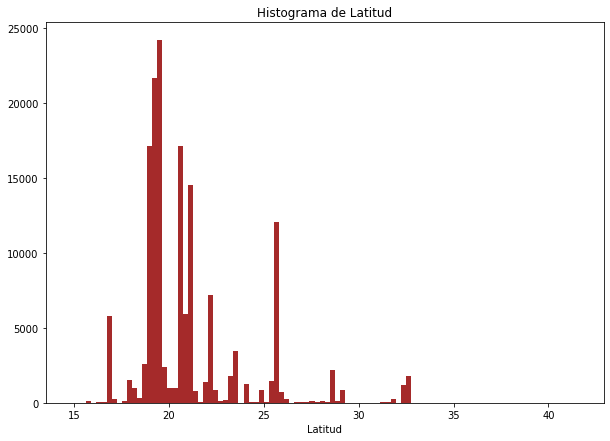

In [29]:
Histograma(df['c_lat'], bins = 100, xlabel = 'Latitud', titulo = 'Histograma de Latitud',
           color = 'brown', log = False, path = 'graficas/hist_lat.png')

_Observamos que existen valores mayores a 35 gracias al eje horizotal de la gráfica, estos son valores extremos ya que no tienen muchos registros_

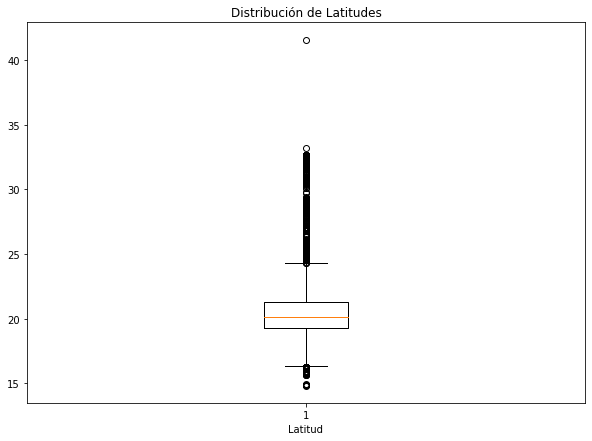

In [30]:
Box(df['c_lat'].dropna().values, 'Latitud', 'Distribución de Latitudes',
    'graficas/aux_box_lat.png')

### Longitud

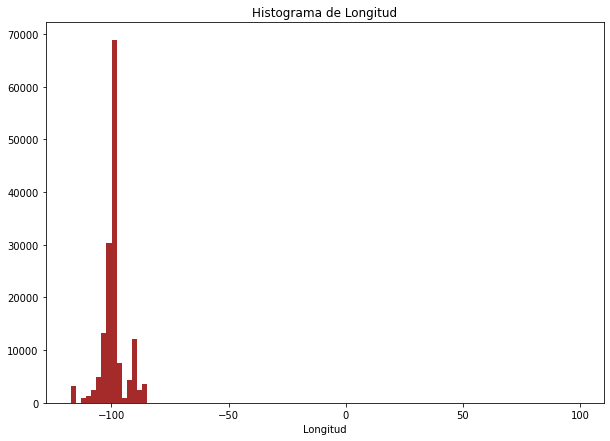

In [31]:
Histograma(df['c_lon'], bins = 100, xlabel = 'Longitud', titulo = 'Histograma de Longitud',
           color = 'brown', log = False, path = 'graficas/hist_long.png')

_Existen valores mayores a -60, los cuales son valores extremos y serán eliminados o ajustados_

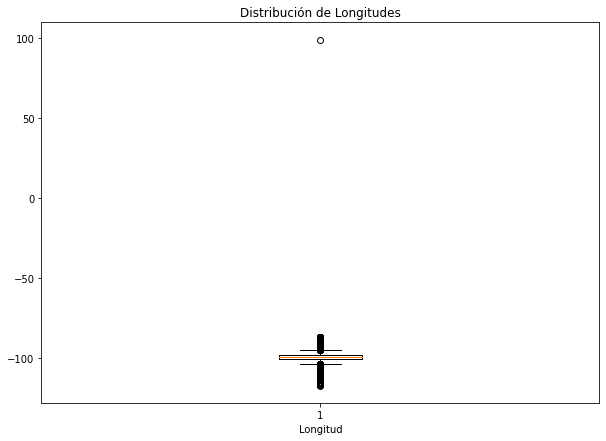

In [32]:
Box(df['c_lon'].dropna().values, 'Longitud', 'Distribución de Longitudes',
    'graficas/aux_box_lon.png')

### Estados

In [33]:
conteo_estados = df['v_estado'].value_counts()
conteo_estados

Distrito Federal                   27911
Estado de MÃ©xico                  20747
Veracruz de Ignacio de la Llave    13747
YucatÃ¡n                           13737
Nuevo LeÃ³n                        13537
QuerÃ©taro                         13535
Morelos                            13531
Puebla                             10358
Jalisco                             7158
Quintana Roo                        6953
San Luis PotosÃ­                    5344
Guerrero                            5333
Tamaulipas                          5082
Chiapas                             4329
Baja California                     3883
Chihuahua                           3315
Sinaloa                             3127
Guanajuato                          3008
Tabasco                             2147
Hidalgo                             1672
Aguascalientes                      1511
Baja California Sur                 1491
Sonora                              1374
Colima                              1173
Nayarit         

In [34]:
Bar(conteo_estados.index, conteo_estados.values, 'Número de Publicaciones por Estado',
    'graficas/pub_por_est.png', 'green')

In [35]:
Pie(conteo_estados.index, conteo_estados.values, 'Número de Publicaciones por Estado',
    'graficas/aux_pub_por_est_pie.png')

In [36]:
price = pd.pivot_table(df, values = 'c_price_aprox_local_currency', index = 'v_estado', aggfunc = np.median)
price.sort_values('c_price_aprox_local_currency', ascending=False, inplace = True)
price = pd.Series(index = price.index, data = [x[0] for x in price.values])
price

v_estado
Quintana Roo                       2774670.350
Nuevo LeÃ³n                        2566570.100
Baja California Sur                2368661.330
Morelos                            2081002.720
Puebla                             1932817.880
QuerÃ©taro                         1882811.910
Distrito Federal                   1789662.250
Jalisco                            1783716.690
YucatÃ¡n                           1689794.000
Guanajuato                         1444981.815
Estado de MÃ©xico                  1437441.585
Sinaloa                            1338104.770
Chiapas                            1337787.470
San Luis PotosÃ­                   1288239.680
Oaxaca                             1288239.680
Nayarit                            1238985.860
Veracruz de Ignacio de la Llave    1238692.070
Guerrero                           1139866.940
Chihuahua                          1050659.920
Coahuila de Zaragoza                973002.825
Aguascalientes                      971134.570
Hida

In [37]:
Bar(price.index, price.values, 'Mediana de Precios por Estado', 'graficas/median_prec_est.png', 'green')

In [38]:
Pie(price.index, price.values, 'Mediana de Precios por Estado', 'graficas/aux_median_prec_est_pie.png')

### Municipios

In [39]:
conteo_municipios = df['v_municipio'].value_counts()[0:10]
conteo_municipios

MÃ©rida             12174
QuerÃ©taro          10043
Veracruz             9892
Benito JuÃ¡rez       8889
Cuernavaca           6255
Monterrey            5724
San Luis PotosÃ­     5010
Miguel Hidalgo       4640
                     4516
Puebla               4362
Name: v_municipio, dtype: int64

In [40]:
Bar(conteo_municipios.index, conteo_municipios.values, '10 Municipios con mas Publicaciones', 
    'graficas/mun_public.png', 'orange')

In [41]:
Pie(conteo_municipios.index, conteo_municipios.values, '10 Municipios con mas Publicaciones', 
    'graficas/aux_mun_public_pie.png')

In [42]:
price_m = pd.pivot_table(df, values = 'c_price_aprox_local_currency', index = 'v_municipio', aggfunc = np.median)
price_m.sort_values('c_price_aprox_local_currency', ascending=False, inplace = True)
price_m = pd.Series(index = price_m.index, data = [x[0] for x in price_m.values])[0:10]
price_m

v_municipio
El Grullo                   6.018720e+07
Temascalapa                 2.138070e+07
Rayones                     1.783717e+07
Villa de Tezontepec         1.615638e+07
CoatlÃ¡n del RÃ­o           1.598722e+07
MocochÃ¡                    1.511563e+07
San Francisco de Conchos    1.486431e+07
RÃ­o Grande                 1.305884e+07
Suma                        1.288545e+07
Galeana                     1.259072e+07
dtype: float64

In [43]:
Bar(price_m.index, price_m.values, 'Mediana de Precios por Municipio', 'graficas/prec_muni.png', 'orange')

In [44]:
Pie(price_m.index, price_m.values, 'Mediana de Precios por Municipio', 'graficas/aux_prec_muni_pie.png')

_Esta informacion puede tener sesgo ya que pueden existir municipios con datos únicos y precios muy caros, por lo que no indica un valor real por municipio, se usara la suma de precios para observar los 10 municipios con más publicaciones y mayores precios_

In [45]:
price_s = pd.pivot_table(df, values = 'c_price_aprox_local_currency', index = 'v_municipio', aggfunc = np.sum)
price_s.sort_values('c_price_aprox_local_currency', ascending=False, inplace = True)
price_s = pd.Series(index = price_s.index, data = [x[0] for x in price_s.values])[0:10]
price_s

v_municipio
Miguel Hidalgo             4.057065e+10
Benito JuÃ¡rez             3.782285e+10
San Pedro Garza GarcÃ­a    3.654061e+10
MÃ©rida                    3.030658e+10
QuerÃ©taro                 2.700693e+10
Monterrey                  2.483438e+10
Cuernavaca                 2.401454e+10
Veracruz                   1.821099e+10
Ãlvaro ObregÃ³n           1.691574e+10
AtizapÃ¡n de Zaragoza      1.680759e+10
dtype: float64

In [46]:
Bar(price_s.index, price_s.values, 'Suma de Precios por Municipio', 'graficas/sum_pre_mun.png', 'orange')

In [47]:
Pie(price_s.index, price_s.values, 'Suma de Precios por Municipio', 'graficas/aux_sum_pre_mun_pie.png')

### Precios vs Renta

In [48]:
operation = df['v_operation'].value_counts()

In [49]:
Bar(operation.index, operation.values, 'Publicaciones por Operacion',
    'graficas/venta_renta.png', ['#37C9FF', '#aaeffa'])

In [50]:
Pie(operation.index, operation.values, 'Publicaciones por Operacion', 'graficas/aux_venta_renta_pie.png')

### Precios Ventas

In [51]:
precio_venta = df[df['v_operation'] == 'sell']['c_price_aprox_local_currency']

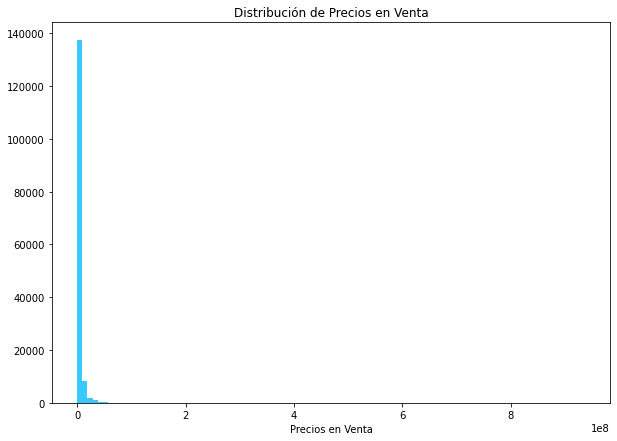

In [52]:
Histograma(data = precio_venta.values, bins = 100, log = False, 
           titulo = 'Distribución de Precios en Venta', path = 'graficas/dist_prec.png', 
           color = '#37C9FF', xlabel = 'Precios en Venta')

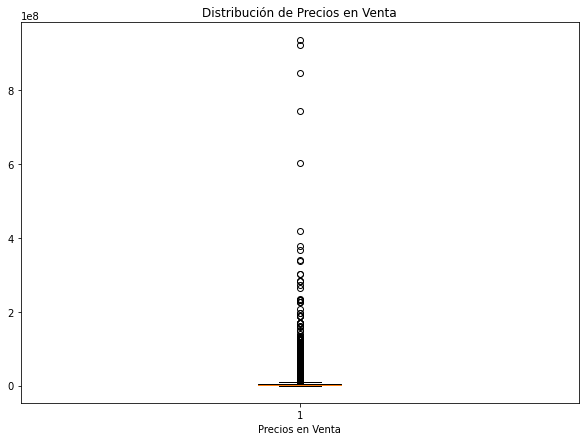

In [53]:
Box(precio_venta.dropna().values, 'Precios en Venta', 'Distribución de Precios en Venta',
    'graficas/aux_dist_prec_box.png')

_Existen registros que son mayores a los 900 millones de pesos, estos se deben de revisar, se tomara un rango entre 0 y 15 millones de pesos para observar la distribucion de precios_

In [54]:
ope = df['v_operation'] == 'sell'
rango = df['c_price_aprox_local_currency'] <= 7000000
precio_venta_2 = df[ope & rango]['c_price_aprox_local_currency']

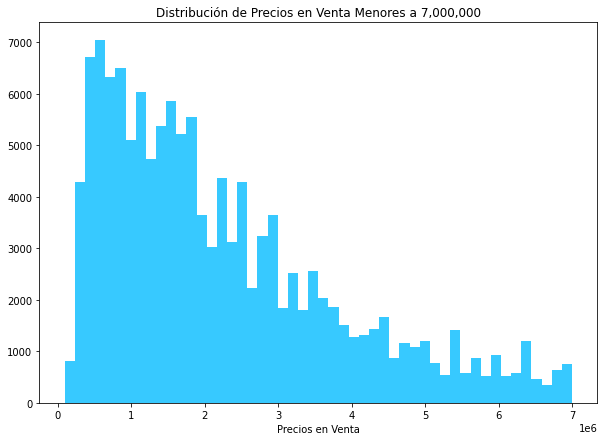

In [55]:
Histograma(data = precio_venta_2.values, bins = 50, log = False, 
           titulo = 'Distribución de Precios en Venta Menores a 7,000,000', path = 'graficas/dist_prec_7M.png', 
           color = '#37C9FF', xlabel = 'Precios en Venta')

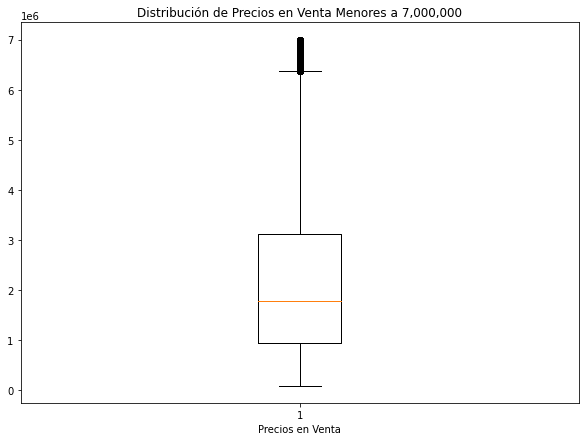

In [56]:
Box(precio_venta_2.dropna().values, 'Precios en Venta', 'Distribución de Precios en Venta Menores a 7,000,000',
    'graficas/aux_dist_prec_7M_box.png')

### Precio Renta

In [57]:
precio_renta = df[df['v_operation'] == 'rent']['c_price_aprox_local_currency']

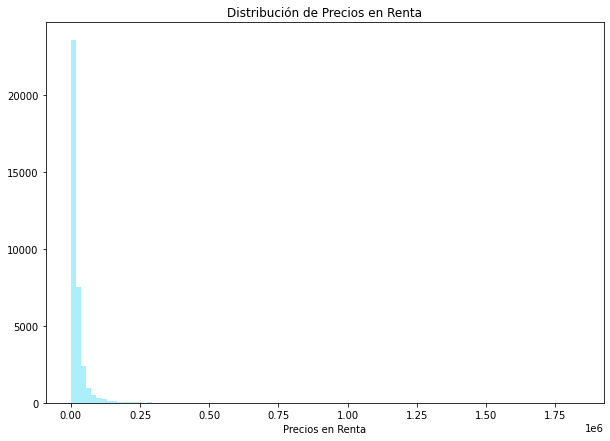

In [58]:
Histograma(data = precio_renta.values, bins = 100, log = False, 
           titulo = 'Distribución de Precios en Renta', path = 'graficas/dist_prec_renta.png', 
           color = '#aaeffa', xlabel = 'Precios en Renta')

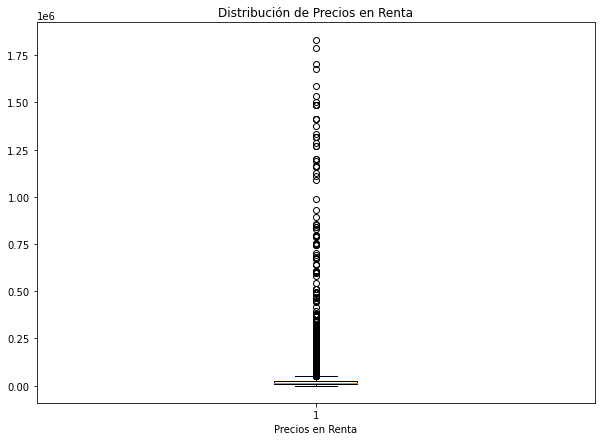

In [59]:
Box(precio_renta.dropna().values, 'Precios en Renta', 'Distribución de Precios en Renta',
    'graficas/aux_dist_prec_renta_box.png')

In [60]:
ope_r = df['v_operation'] == 'rent'
rango_r = df['c_price_aprox_local_currency'] <= 250000
precio_venta_2_r = df[ope_r & rango_r]['c_price_aprox_local_currency']

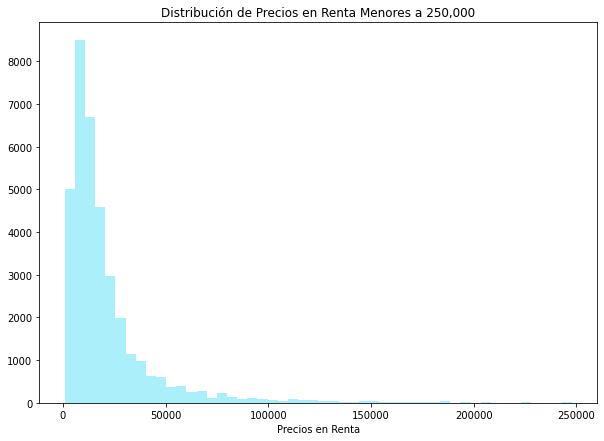

In [61]:
Histograma(data = precio_venta_2_r.values, bins = 50, log = False, 
           titulo = 'Distribución de Precios en Renta Menores a 250,000', 
           path = 'graficas/dist_prec_renta_250m.png', color = '#aaeffa', xlabel = 'Precios en Renta')

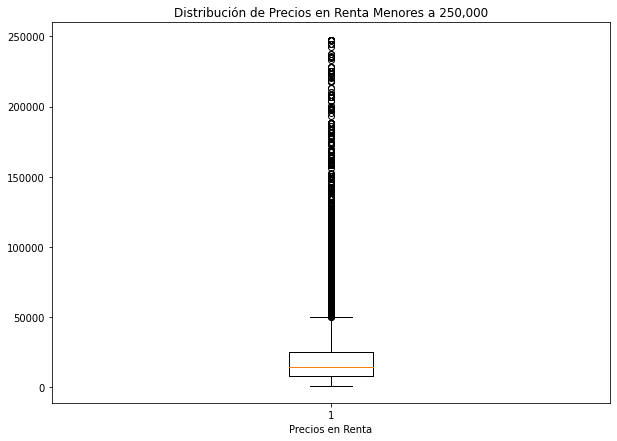

In [62]:
Box(precio_venta_2_r.dropna().values, 'Precios en Renta', 'Distribución de Precios en Renta Menores a 250,000',
    'graficas/aux_dist_prec_renta_250m_box.png')

### Moneda

In [63]:
moneda = df['v_currency'].value_counts()

In [64]:
Bar(moneda.index, moneda.values, 'Monedas por Publicacion', 
    'graficas/dist_moneda.png', ['green', 'blue', 'aqua', 'yellow'])

_Se revisaran las publicaciones con moneda distinta al peso mexicano_

In [65]:
Pie(moneda.index, moneda.values, 'Monedas por Publicacion', 'graficas/aux_dist_moneda_pie.png')

### Tipo de Inmueble

In [66]:
casa = pd.pivot_table(df[df['v_property_type'] == 'house'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

depa = pd.pivot_table(df[df['v_property_type'] == 'apartment'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

ph = pd.pivot_table(df[df['v_property_type'] == 'PH'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

tienda = pd.pivot_table(df[df['v_property_type'] == 'store'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

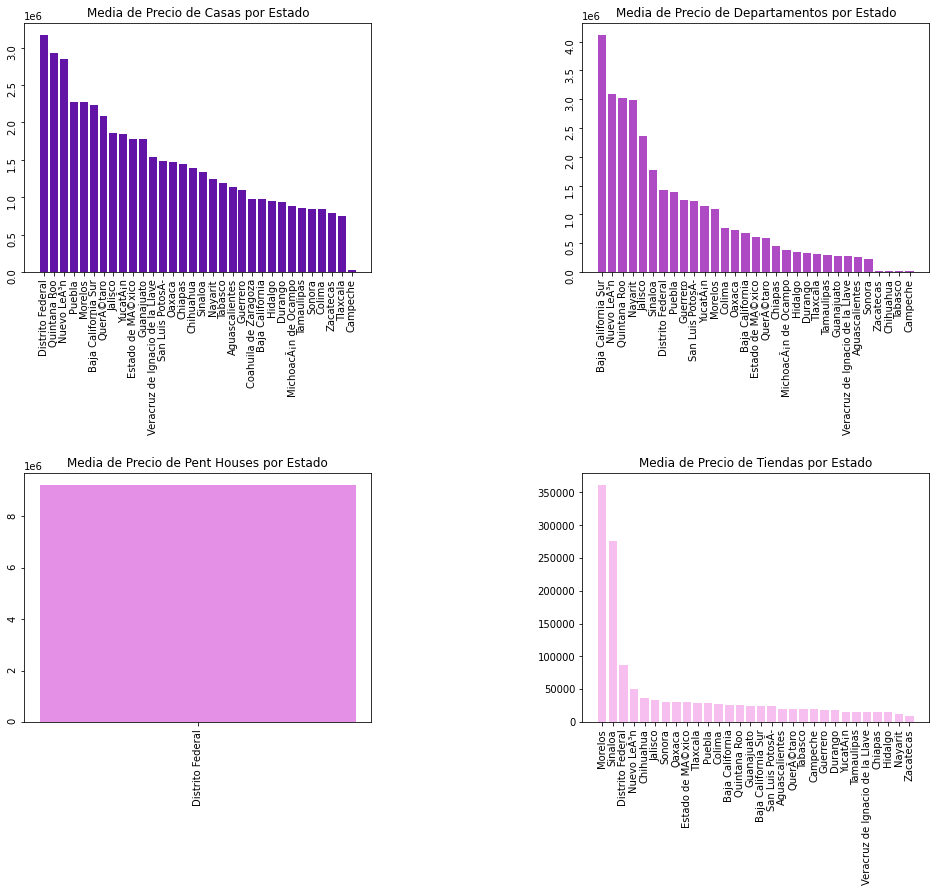

In [67]:
fig, ax = plt.subplots(2,2, figsize=(18, 15))
fig.tight_layout(pad=18.0)

# Casas
ax[0][0].bar(casa.index, casa.c_price_aprox_local_currency, color = '#6214a7')
ax[0][0].set_title('Media de Precio de Casas por Estado')
ax[0][0].tick_params(labelrotation=90)

#  Departamentos
ax[0][1].bar(depa.index, depa.c_price_aprox_local_currency, color = '#ae4ac4')
ax[0][1].set_title('Media de Precio de Departamentos por Estado')
ax[0][1].tick_params(labelrotation=90)

# Pent House
ax[1][0].bar(ph.index, ph.c_price_aprox_local_currency, color = '#e390e6')
ax[1][0].set_title('Media de Precio de Pent Houses por Estado')
ax[1][0].tick_params(labelrotation=90)

# Tienda
ax[1][1].bar(tienda.index, tienda.c_price_aprox_local_currency, color = '#f7bff0')
ax[1][1].set_title('Media de Precio de Tiendas por Estado')
plt.xticks(rotation = 90)

plt.savefig('graficas/dist_tipo.png', dpi = 200)
plt.show()

## d_created_on to Datetime

In [68]:
df['d_created_on'] = pd.to_datetime(df['d_created_on'], format='%d/%m/%Y')

### Agrupación por Mes

In [69]:
mes_publ = df.set_index('d_created_on').groupby(by=[df.set_index('d_created_on').index.month]).agg('count')['v_operation']
mes_publ

d_created_on
1      4413
2      5418
3      6415
4      9234
5     10635
6     11662
7     12783
8     47026
9     31109
10    43669
11     2696
12     3008
Name: v_operation, dtype: int64

In [70]:
mes_label = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
            'Octubre', 'Noviembre', 'Diciembre']

Line(mes_label, mes_publ.values, 'Conteo de Publicaciones por Mes', 'graficas/conteo_mes.png', 'blue')

### Agrupación por Día

In [71]:
dia_publ = df.set_index('d_created_on').groupby(by=[df.set_index('d_created_on').index.dayofweek]).agg('count')['v_operation']
dia_publ

d_created_on
0    30975
1    19666
2    28551
3    29236
4    29804
5    37340
6    12496
Name: v_operation, dtype: int64

In [72]:
dia_label = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

Line(dia_label, dia_publ.values, 'Conteo de Publicaciones por Día', 'graficas/conteo_dia.png', 'blue')

### Mediana en Precio por Mes

In [73]:
mes_price = df.set_index('d_created_on').groupby(by=[df.set_index('d_created_on').index.month]).agg('median')['c_price_aprox_local_currency']
mes_price

d_created_on
1     1635073.49
2     1680064.74
3     1808919.33
4     1872628.89
5     1683630.27
6     1585525.89
7     1535978.09
8     1654892.58
9     1442333.11
10    1367840.26
11    1763897.61
12    2076439.96
Name: c_price_aprox_local_currency, dtype: float64

In [74]:
mes_label = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
            'Octubre', 'Noviembre', 'Diciembre']

Line(mes_label, mes_price.values, 'Mediana de Precios por Mes', 'graficas/precio_mes.png', 'blue')

## Superficie

In [75]:
sup_est = df.groupby(by = 'v_estado').agg('median')['c_surface_total_in_m2'].sort_values(ascending=False)
sup_est

v_estado
Morelos                            350.0
YucatÃ¡n                           287.0
Coahuila de Zaragoza               224.0
Chihuahua                          200.0
Baja California Sur                200.0
Colima                             187.0
QuerÃ©taro                         180.0
Estado de MÃ©xico                  165.0
Sonora                             162.0
Guanajuato                         160.0
Aguascalientes                     160.0
Nuevo LeÃ³n                        155.0
Veracruz de Ignacio de la Llave    152.0
Jalisco                            142.0
Puebla                             141.0
Campeche                           141.0
Durango                            128.0
Sinaloa                            126.0
Tabasco                            124.0
Baja California                    120.0
San Luis PotosÃ­                   120.0
Hidalgo                            120.0
Quintana Roo                       118.0
Chiapas                            112.0
Nayarit

In [76]:
Bar(sup_est.index, sup_est.values, 'Mediana de Superficien por Estado en m2', 'graficas/sup_est.png', '#dd5e00')

In [77]:
sup_type = df.groupby(by = ['v_property_type']).agg('median')['c_surface_total_in_m2'].sort_values(ascending=False)
sup_type

v_property_type
PH           220.0
house        200.0
store         80.0
apartment     59.0
Name: c_surface_total_in_m2, dtype: float64

In [78]:
Bar(sup_type.index, sup_type.values, 'Mediana de Superficien por Tipo de Inmueble en m2',
    'graficas/sup_tipo_inmu.png', ['#6214a7', '#ae4ac4', '#e390e6', '#f7bff0'])

## Word Clouds

### Título

In [79]:
#lista de palabras
desc_text = []

# separación de texto
for descrip in df['t_title'].apply(lambda x: x.split(' ')):
    for word in descrip:
        desc_text.append(word)
        
# paths
path_texto="titulo_wordcloud.txt"
path_imagen="graficas/titulo_wordcloud.png"

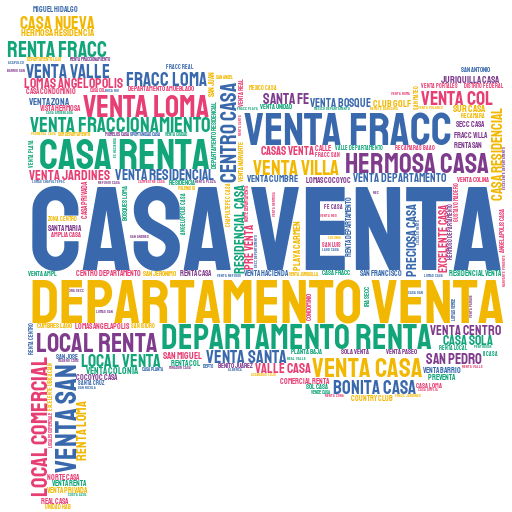

In [80]:
word_cloud(desc_text, path_texto, path_imagen)

### Descripción

In [81]:
#lista de palabras
desc_text = []

# separación de texto
for descrip in df['t_description'].apply(lambda x: x.split(' ')):
    for word in descrip:
        desc_text.append(word)
        
# paths
path_texto="descrip_wordcloud.txt"
path_imagen="graficas/titulo_wordcloud.png"

_Se tomarán solo un millon de palabras debido a los tiempos de espera, estas palabras serán acomodadas aleatoriamente_

In [82]:
# random seed
np.random.seed(17021998)

#shuffle lista
np.random.shuffle(desc_text)

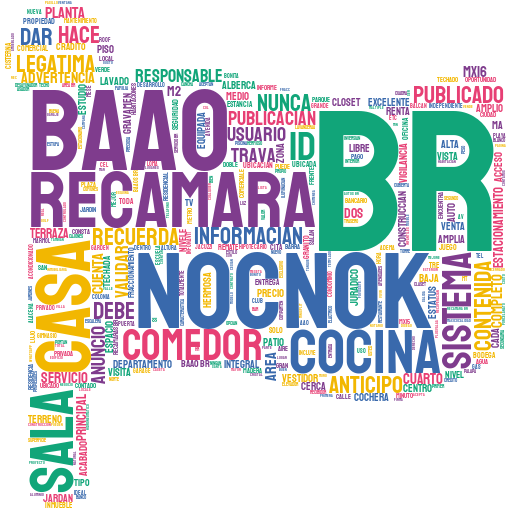

In [83]:
word_cloud(desc_text[0:1000000], path_texto, path_imagen)

## Calidad de Datos

In [84]:
# Registros iniciales
df.shape[0]

188068

### Outliers Variables Discretas 

In [85]:
df['v_currency'].value_counts()

MXN    175393
USD     10034
ARS        26
CLP         1
Name: v_currency, dtype: int64

_Se eliminarán los registros que contengan información con otro tipo de moneda que no sea peso mexicano. Existen 10061 registros y representan un 5.43% del total de registros._

In [86]:
df = df[df['v_currency'] == 'MXN']

### Outliers Variables Continuas

_Se hará un análisis distinto para las categorías de venta y renta ya que los precios en ambas categorías son muy distintos entre si._

### Venta IQR

In [87]:
df_venta = df[df['v_operation'] == 'sell'].copy(deep = True)
df_venta.shape

(141133, 19)

In [88]:
# Obtenemos los cuantíles para las variables
Q1_v = df_venta.quantile(.25)
Q3_v = df_venta.quantile(.75)

#IQR
IQR_v = Q3_v - Q1_v

In [89]:
Q1_v

c_lat                           1.930161e+01
c_lon                          -1.004214e+02
c_price                         1.008952e+06
c_price_aprox_local_currency    9.998256e+05
c_price_aprox_usd               5.315818e+04
c_surface_total_in_m2           9.000000e+01
c_surface_covered_in_m2         8.400000e+01
c_price_per_m2                  8.596491e+03
Name: 0.25, dtype: float64

In [90]:
Q3_v

c_lat                           2.122980e+01
c_lon                          -9.833350e+01
c_price                         3.700000e+06
c_price_aprox_local_currency    3.666529e+06
c_price_aprox_usd               1.949400e+05
c_surface_total_in_m2           3.330000e+02
c_surface_covered_in_m2         2.640000e+02
c_price_per_m2                  1.638655e+04
Name: 0.75, dtype: float64

In [91]:
IQR_v

c_lat                           1.928187e+00
c_lon                           2.087895e+00
c_price                         2.691048e+06
c_price_aprox_local_currency    2.666703e+06
c_price_aprox_usd               1.417818e+05
c_surface_total_in_m2           2.430000e+02
c_surface_covered_in_m2         1.800000e+02
c_price_per_m2                  7.790063e+03
dtype: float64

_Observamos que las variables geográficas no varian mas que dos unidades a diferencia de lo visto anteriormente en el análisis y visualización de datos que pueden variar hasta en 100 unidades. El precio puede variar en 2.6 millones de pesos, que es un precio de acuerdo la operación de ventas. Y en superficie total puede variar hasta en 239 metros cuadrados, la diferencia entre un departamento pequeño y un terreno._

In [92]:
# Valores superiores e inferiores
INF_v=Q1_v-1.5*(IQR_v)
SUP_v=Q3_v+1.5*(IQR_v)

In [93]:
# número de outliers por variable sin tomar en cuenta la variable de fechas
out_IQR_v = ((df_venta.iloc[:, 1:]<INF_v)|(df_venta.iloc[:, 1:]>SUP_v)).sum()[SUP_v.index]

#outliers con respecto al total
out_IQR_100_v = (out_IQR_v/df_venta.shape[0])*100

In [94]:
# Outliers IQR
IQR_df_v = pd.concat([out_IQR_v, out_IQR_100_v], axis = 1, join='inner')
IQR_df_v.columns = ['n outliers IQR', 'n outliers IQR %']
IQR_df_v

n outliers IQR  n outliers IQR %
c_lat                                  16847         11.936967
c_lon                                  24440         17.316999
c_price                                11792          8.355239
c_price_aprox_local_currency           11809          8.367285
c_price_aprox_usd                      11809          8.367285
c_surface_total_in_m2                   6161          4.365386
c_surface_covered_in_m2                 7654          5.423253
c_price_per_m2                         12057          8.543006

_Tomando en cuenta este método podrían eliminarse en el mejor de los casos 24440 registros, lo que representa un 17.31% de la información total en la operación de venta. Se usarán distintos métodos para eliminar outliers para no tener errores por algún sesgo en el método. Podemos observar que la mayor cantidad de outliers se encuentra en las variables geográficas esto debido a que toma importancia al centro del país mientras que los extremos, como los estados de Baja California, Yacatán, Quintana Roo, entre otros, no se tomán en cuenta por estar alejados. Esto llevaría a grandes errores ya que Mérida es uno de los municipios con mayor número de publicaciones en la tabla de datos._

In [95]:
# guardar lista de indices
index_general = []
# recorrer cada variables para obtener indices
for variable in SUP_v.index:
    iqr_aux = (df_venta[variable]<INF_v[variable])|(df_venta[variable]>SUP_v[variable])
    index_general.append(list(iqr_aux[iqr_aux].index))
    
# diccionario de variables y sus indices con outliers
dict_IQR_v = dict(zip(SUP_v.index, index_general))

### Percentiles

In [96]:
# percentiles extremos
Q5_v = df_venta.quantile(.5)
Q95_v = df_venta.quantile(.95)

In [97]:
Q5_v

c_lat                           1.967463e+01
c_lon                          -9.922490e+01
c_price                         1.976000e+06
c_price_aprox_local_currency    1.959660e+06
c_price_aprox_usd               1.041901e+05
c_surface_total_in_m2           1.720000e+02
c_surface_covered_in_m2         1.560000e+02
c_price_per_m2                  1.157174e+04
Name: 0.5, dtype: float64

In [98]:
Q95_v

c_lat                           2.578784e+01
c_lon                          -8.959144e+01
c_price                         1.050000e+07
c_price_aprox_local_currency    1.040748e+07
c_price_aprox_usd               5.533393e+05
c_surface_total_in_m2           1.000000e+03
c_surface_covered_in_m2         5.600000e+02
c_price_per_m2                  3.636364e+04
Name: 0.95, dtype: float64

_Observamos un cambio en el rango de las variables geográficas ya que este no difieren de una unidad en ambos casos. En este método existe un rango más amplio en las variables de precio, que van desde un millon novecientos hasta los 10 millones y medio de pesos._

In [99]:
# número de outliers por variable
out_Per_v = ((df_venta.iloc[:, 1:]<Q5_v)|(df_venta.iloc[:, 1:]>Q95_v)).sum()[Q95_v.index]

#outliers con respecto al total
out_Per_100_v = (out_Per_v / df_venta.shape[0]) * 100

In [100]:
# Outliers Percentiles
Per_df_v = pd.concat([out_Per_v, out_Per_100_v], axis = 1, join='inner')
Per_df_v.columns = ['n outliers Percentil', 'n outliers Percentil %']
Per_df_v

n outliers Percentil  n outliers Percentil %
c_lat                                        64171               45.468459
c_lon                                        64171               45.468459
c_price                                      77569               54.961632
c_price_aprox_local_currency                 77593               54.978637
c_price_aprox_usd                            77593               54.978637
c_surface_total_in_m2                        37186               26.348196
c_surface_covered_in_m2                      74328               52.665216
c_price_per_m2                               71367               50.567195

_Observamos una mayor cantidad de registros extremos, los cuales eliminarían mas del 50% de los registros en nuestra tabla de datos._

In [101]:
# guardar lista de indices
index_general = []
# recorrer cada variables para obtener indices
for variable in Q95_v.index:
    per_aux = (df_venta[variable]<Q5_v[variable])|(df_venta[variable]>Q95_v[variable])
    index_general.append(list(per_aux[per_aux].index))
    
# diccionario de variables y sus indices con outliers
dict_Per_v = dict(zip(Q95_v.index, index_general))

### Z-Score

In [102]:
dict_Z_v = {}
# iteraciones por variables númericas para z-score usando variables anteriores SUP
for i in SUP_v.index:
    # datos de variables numéricas
    data = df_venta.loc[:, i]
    # z-score para valuación
    z = np.abs(stats.zscore(data))
    # indices de variables a eliminar
    indices_aux_z = np.where(z > 3)
    # agregar al diccionario
    dict_Z_v[i] = list(indices_aux_z[0])

In [103]:
# número de outliers por variable
out_Z_v = pd.Series(index = list(dict_Z_v.keys()), data = [len(x) for x in dict_Z_v.values()])

#outliers con respecto al total
out_Z_100_v = (out_Z_v / df_venta.shape[0]) * 100

In [104]:
# Outliers IQR
Z_df_v = pd.concat([out_Z_v, out_Z_100_v], axis = 1, join='inner')
Z_df_v.columns = ['n outliers Z-Score', 'n outliers Z-Score %']
Z_df_v

n outliers Z-Score  n outliers Z-Score %
c_lat                                          0              0.000000
c_lon                                          0              0.000000
c_price                                     1157              0.819794
c_price_aprox_local_currency                1162              0.823337
c_price_aprox_usd                           1162              0.823337
c_surface_total_in_m2                          0              0.000000
c_surface_covered_in_m2                        0              0.000000
c_price_per_m2                                 0              0.000000

_Existe una menor cantidad de valores extremos con este método. Se usaran la combinación de todos los métodos para obtener los valores a eliminar._

### Tabla de Outliers Venta

In [105]:
# union de IQR y Percentil
df_outliers_v = pd.concat([IQR_df_v, Per_df_v], axis = 1, join='inner')
# union de tabla y Z-Score
df_outliers_v = pd.concat([df_outliers_v, Z_df_v], axis = 1, join='inner')
df_outliers_v

n outliers IQR  n outliers IQR %  \
c_lat                                  16847         11.936967   
c_lon                                  24440         17.316999   
c_price                                11792          8.355239   
c_price_aprox_local_currency           11809          8.367285   
c_price_aprox_usd                      11809          8.367285   
c_surface_total_in_m2                   6161          4.365386   
c_surface_covered_in_m2                 7654          5.423253   
c_price_per_m2                         12057          8.543006   

                              n outliers Percentil  n outliers Percentil %  \
c_lat                                        64171               45.468459   
c_lon                                        64171               45.468459   
c_price                                      77569               54.961632   
c_price_aprox_local_currency                 77593               54.978637   
c_price_aprox_usd                            77593               54.978637   
c_surface_total_in_m2                        37186               26.348196   
c_surface_covered_in_m2                      74328               52.665216   
c_price_per_m2                               71367               50.567195   

                              n outliers Z-Score  n outliers Z-Score %  
c_lat                                          0              0.000000  
c_lon                                          0              0.000000  
c_price                                     1157              0.819794  
c_price_aprox_local_currency                1162              0.823337  
c_price_aprox_usd                           1162              0.823337  
c_surface_total_in_m2                          0              0.000000  
c_surface_covered_in_m2                        0              0.000000  
c_price_per_m2                                 0              0.000000

In [106]:
# indices de registros en dos métodos
aux_ind_out_v = []
# iteración por variable
for i in df_outliers_v.index:
    # variables que existen en dos métodos, todas las combinaciones
    a = list(set(dict_IQR_v[i]) & set(dict_Per_v[i]))
    b = list(set(dict_IQR_v[i]) & set(dict_Z_v[i]))
    c = list(set(dict_Z_v[i]) & set(dict_Per_v[i]))

    # extensión de valores y creación de lista única
    a.extend(b)
    a.extend(c)
    aux_ind_out_v.append(list(set(a)))

In [107]:
#Agregar indices de outliers
df_outliers_v['indices'] = aux_ind_out_v

#total outliers
df_outliers_v['total outliers'] = df_outliers_v['indices'].apply(lambda x: len(x)).values

#porcentaje de outliers
df_outliers_v['% outliers'] = (df_outliers_v['total outliers'] / df_venta.shape[0]) * 100

# nuevo indice
df_outliers_v = df_outliers_v.reset_index()

# cambio de nombre a variable index
df_outliers_v.rename(columns = {'index': 'features'}, inplace = True)

# acomodo de columnas
df_outliers_v = df_outliers_v[['features', 'n outliers IQR', 'n outliers Percentil', 'n outliers Z-Score',
                          'n outliers IQR %', 'n outliers Percentil %', 'n outliers Z-Score %',
                          'total outliers', '% outliers', 'indices']]
df_outliers_v

features  n outliers IQR  n outliers Percentil  \
0                         c_lat           16847                 64171   
1                         c_lon           24440                 64171   
2                       c_price           11792                 77569   
3  c_price_aprox_local_currency           11809                 77593   
4             c_price_aprox_usd           11809                 77593   
5         c_surface_total_in_m2            6161                 37186   
6       c_surface_covered_in_m2            7654                 74328   
7                c_price_per_m2           12057                 71367   

   n outliers Z-Score  n outliers IQR %  n outliers Percentil %  \
0                   0         11.936967               45.468459   
1                   0         17.316999               45.468459   
2                1157          8.355239               54.961632   
3                1162          8.367285               54.978637   
4                1162          8.367285               54.978637   
5                   0          4.365386               26.348196   
6                   0          5.423253               52.665216   
7                   0          8.543006               50.567195   

   n outliers Z-Score %  total outliers  % outliers  \
0              0.000000            5924    4.197459   
1              0.000000           15225   10.787697   
2              0.819794            7454    5.281543   
3              0.823337            7478    5.298548   
4              0.823337            7478    5.298548   
5              0.000000            3370    2.387819   
6              0.000000            6673    4.728164   
7              0.000000            6486    4.595665   

                                             indices  
0  [98306, 65552, 98320, 131092, 98326, 163862, 3...  
1  [98306, 32773, 98311, 65543, 32775, 32778, 131...  
2  [131072, 131075, 163843, 131081, 131084, 32783...  
3  [131072, 131075, 163843, 131081, 131084, 32783...  
4  [131072, 131075, 163843, 131081, 131084, 32783...  
5  [131076, 131077, 147462, 81931, 8204, 73740, 1...  
6  [163843, 32783, 98323, 32790, 32793, 32798, 16...  
7  [131072, 65542, 131081, 65558, 131097, 32807, ...

In [108]:
# número de elemtos al eliminar
aux_elementos_v = []

#iteración por indices
for variable in range(df_outliers_v.shape[0]):
    # lista auxiliar para variables no borradas
    lista_auxiliar = list(set(df_outliers_v['indices'][variable]) & set(df_venta.index))
    # eliminar registro
    df_venta.drop(lista_auxiliar, inplace = True)
    aux_elementos_v.append(df_venta.shape[0])

### Número de elemetos al eliminar outliers venta

In [109]:
pd.Series(index = df_outliers_v['features'], data = aux_elementos_v)

features
c_lat                           135209
c_lon                           124638
c_price                         117458
c_price_aprox_local_currency    117437
c_price_aprox_usd               117437
c_surface_total_in_m2           115679
c_surface_covered_in_m2         113169
c_price_per_m2                  108653
dtype: int64

_Las variables con mayor número de outliers fueron las de longitud, esto por la amplitud del país, seguido de las variables de precio, que al estar conectadas, estas contenian los mismo outliers._

_El conjunto de venta empezó con 141,133 y terminó con 108653 registro, lo que reduce la tabla de ventas en un 23%_

### Renta IQR

In [110]:
df_renta = df[df['v_operation'] == 'rent'].copy(deep = True)
df_renta.shape

(34260, 19)

In [111]:
# Obtenemos los cuantíles para las variables
Q1_r = df_renta.quantile(.25)
Q3_r = df_renta.quantile(.75)

#IQR
IQR_r = Q3_r - Q1_r

In [112]:
Q1_r

c_lat                             19.200309
c_lon                           -100.403824
c_price                         8000.000000
c_price_aprox_local_currency    7927.590000
c_price_aprox_usd                421.490000
c_surface_total_in_m2              0.000000
c_surface_covered_in_m2           60.000000
c_price_per_m2                    60.714286
Name: 0.25, dtype: float64

In [113]:
Q3_r

c_lat                              21.932685
c_lon                             -97.834755
c_price                         23705.000000
c_price_aprox_local_currency    23510.810000
c_price_aprox_usd                1250.010000
c_surface_total_in_m2             230.000000
c_surface_covered_in_m2           222.000000
c_price_per_m2                    150.000000
Name: 0.75, dtype: float64

In [114]:
IQR_r

c_lat                               2.732376
c_lon                               2.569069
c_price                         15705.000000
c_price_aprox_local_currency    15583.220000
c_price_aprox_usd                 828.520000
c_surface_total_in_m2             230.000000
c_surface_covered_in_m2           162.000000
c_price_per_m2                     89.285714
dtype: float64

_De igual manera que en el análisis de las propiedades en venta observamos que el IQR no varía en más de dos unidades en las variables geográficas, el cambio más grande es en el valor de los precios ya que estos no varían más de 15,700 pesos a comparación de los 2.6 millones en la sección de venta._

In [115]:
# Valores superiores e inferiores
INF_r=Q1_r-1.5*(IQR_r)
SUP_r=Q3_r+1.5*(IQR_r)

In [116]:
# número de outliers por variable sin tomar en cuenta la variable de fechas
out_IQR_r = ((df_renta.iloc[:, 1:]<INF_r)|(df_renta.iloc[:, 1:]>SUP_r)).sum()[SUP_r.index]

#outliers con respecto al total
out_IQR_100_r = (out_IQR_r/df_renta.shape[0])*100

In [117]:
# Outliers IQR
IQR_df_r = pd.concat([out_IQR_r, out_IQR_100_r], axis = 1, join='inner')
IQR_df_r.columns = ['n outliers IQR', 'n outliers IQR %']
IQR_df_r

n outliers IQR  n outliers IQR %
c_lat                                   1040          3.035610
c_lon                                   6520         19.030940
c_price                                 2476          7.227087
c_price_aprox_local_currency            2475          7.224168
c_price_aprox_usd                       2475          7.224168
c_surface_total_in_m2                   1964          5.732633
c_surface_covered_in_m2                 2153          6.284297
c_price_per_m2                          1880          5.487449

_Observamos un cambio en la cantidad de outliers, ya que casi en todas las variables la cantidad es menor. Pero en el caso de la longitud hay una mayor cantidad de outliers, estos deberán ser eliminados correctamente ya que podrían afectar el análisis._

In [118]:
# guardar lista de indices
index_general = []
# recorrer cada variables para obtener indices
for variable in SUP_r.index:
    iqr_aux = (df_renta[variable]<INF_r[variable])|(df_renta[variable]>SUP_r[variable])
    index_general.append(list(iqr_aux[iqr_aux].index))
    
# diccionario de variables y sus indices con outliers
dict_IQR_r = dict(zip(SUP_r.index, index_general))

### Percentiles Renta

In [119]:
# percentiles extremos
Q5_r = df_renta.quantile(.5)
Q95_r = df_renta.quantile(.95)

In [120]:
Q5_r

c_lat                              20.587859
c_lon                             -99.240187
c_price                         13900.000000
c_price_aprox_local_currency    13774.210000
c_price_aprox_usd                 732.340000
c_surface_total_in_m2             100.000000
c_surface_covered_in_m2           120.000000
c_price_per_m2                     91.157856
Name: 0.5, dtype: float64

In [121]:
Q95_r

c_lat                              25.735695
c_lon                             -89.586964
c_price                         56300.000000
c_price_aprox_local_currency    55997.040000
c_price_aprox_usd                2977.220000
c_surface_total_in_m2            1000.000000
c_surface_covered_in_m2           530.000000
c_price_per_m2                    320.000000
Name: 0.95, dtype: float64

_Observamos un cambio parecido en la variable longitud con respecto al análisis de venta, auqneu se reduce en una unidad el rango de la variable latitud. El rango de precios es mucho menor ya que va desde los 13,900 hasta los 56,300, los que son rentas bastantes caras para la república. De igual manera los metros cuadrados son muy elevados en el rango inferior ya que la mayoría de los departamentos en la ciudad o en centros turísticos son menores a 100 metros cuadrados._

In [122]:
# número de outliers por variable
out_Per_r = ((df_renta.iloc[:, 1:]<Q5_r)|(df_renta.iloc[:, 1:]>Q95_r)).sum()[Q95_r.index]

#outliers con respecto al total
out_Per_100_r = (out_Per_r / df_renta.shape[0]) * 100

In [123]:
# Outliers Percentiles
Per_df_r = pd.concat([out_Per_r, out_Per_100_r], axis = 1, join='inner')
Per_df_r.columns = ['n outliers Percentil', 'n outliers Percentil %']
Per_df_r

n outliers Percentil  n outliers Percentil %
c_lat                                        16009               46.727963
c_lon                                        16023               46.768827
c_price                                      18841               54.994162
c_price_aprox_local_currency                 18837               54.982487
c_price_aprox_usd                            18837               54.982487
c_surface_total_in_m2                        10988               32.072388
c_surface_covered_in_m2                      17306               50.513719
c_price_per_m2                               15522               45.306480

_A pesar del incremento de valores extremos con respecto al método anterior, observamos una menor cantidad comparado con el mismo método pero en los registros de renta._

In [124]:
# guardar lista de indices
index_general = []
# recorrer cada variables para obtener indices
for variable in Q95_r.index:
    per_aux = (df_renta[variable]<Q5_r[variable])|(df_renta[variable]>Q95_r[variable])
    index_general.append(list(per_aux[per_aux].index))
    
# diccionario de variables y sus indices con outliers
dict_Per_r = dict(zip(Q95_r.index, index_general))

### Z-Score Renta

In [125]:
dict_Z_r = {}
# iteraciones por variables númericas para z-score usando variables anteriores SUP
for i in SUP_r.index:
    # datos de variables numéricas
    data = df_renta.loc[:, i]
    # z-score para valuación
    z = np.abs(stats.zscore(data))
    # indices de variables a eliminar
    indices_aux_z = np.where(z > 3)
    # agregar al diccionario
    dict_Z_r[i] = list(indices_aux_z[0])

In [126]:
# número de outliers por variable
out_Z_r = pd.Series(index = list(dict_Z_r.keys()), data = [len(x) for x in dict_Z_r.values()])

#outliers con respecto al total
out_Z_100_r = (out_Z_r / df_renta.shape[0]) * 100

In [127]:
# Outliers IQR
Z_df_r = pd.concat([out_Z_r, out_Z_100_r], axis = 1, join='inner')
Z_df_r.columns = ['n outliers Z-Score', 'n outliers Z-Score %']
Z_df_r

n outliers Z-Score  n outliers Z-Score %
c_lat                                          0              0.000000
c_lon                                          0              0.000000
c_price                                      243              0.709282
c_price_aprox_local_currency                 235              0.685931
c_price_aprox_usd                            235              0.685931
c_surface_total_in_m2                          0              0.000000
c_surface_covered_in_m2                        0              0.000000
c_price_per_m2                                 0              0.000000

_De igual manera que en los registros de venta vemos una menor cantidad de valores extremos y estos se encuentran en las mismas tres variables relacionadas al precio._

### Tabla de Outliers Renta

In [128]:
# union de IQR y Percentil
df_outliers_r = pd.concat([IQR_df_r, Per_df_r], axis = 1, join='inner')
# union de tabla y Z-Score
df_outliers_r = pd.concat([df_outliers_r, Z_df_r], axis = 1, join='inner')
df_outliers_r

n outliers IQR  n outliers IQR %  \
c_lat                                   1040          3.035610   
c_lon                                   6520         19.030940   
c_price                                 2476          7.227087   
c_price_aprox_local_currency            2475          7.224168   
c_price_aprox_usd                       2475          7.224168   
c_surface_total_in_m2                   1964          5.732633   
c_surface_covered_in_m2                 2153          6.284297   
c_price_per_m2                          1880          5.487449   

                              n outliers Percentil  n outliers Percentil %  \
c_lat                                        16009               46.727963   
c_lon                                        16023               46.768827   
c_price                                      18841               54.994162   
c_price_aprox_local_currency                 18837               54.982487   
c_price_aprox_usd                            18837               54.982487   
c_surface_total_in_m2                        10988               32.072388   
c_surface_covered_in_m2                      17306               50.513719   
c_price_per_m2                               15522               45.306480   

                              n outliers Z-Score  n outliers Z-Score %  
c_lat                                          0              0.000000  
c_lon                                          0              0.000000  
c_price                                      243              0.709282  
c_price_aprox_local_currency                 235              0.685931  
c_price_aprox_usd                            235              0.685931  
c_surface_total_in_m2                          0              0.000000  
c_surface_covered_in_m2                        0              0.000000  
c_price_per_m2                                 0              0.000000

In [129]:
# indices de registros en dos métodos
aux_ind_out_r = []
# iteración por variable
for i in df_outliers_r.index:
    # variables que existen en dos métodos, todas las combinaciones
    a = list(set(dict_IQR_r[i]) & set(dict_Per_r[i]))
    b = list(set(dict_IQR_r[i]) & set(dict_Z_r[i]))
    c = list(set(dict_Z_r[i]) & set(dict_Per_r[i]))

    # extensión de valores y creación de lista única
    a.extend(b)
    a.extend(c)
    aux_ind_out_r.append(list(set(a)))

In [130]:
#Agregar indices de outliers
df_outliers_r['indices'] = aux_ind_out_r

#total outliers
df_outliers_r['total outliers'] = df_outliers_r['indices'].apply(lambda x: len(x)).values

#porcentaje de outliers
df_outliers_r['% outliers'] = (df_outliers_r['total outliers'] / df_renta.shape[0]) * 100

# nuevo indice
df_outliers_r = df_outliers_r.reset_index()

# cambio de nombre a variable index
df_outliers_r.rename(columns = {'index': 'features'}, inplace = True)

# acomodo de columnas
df_outliers_r = df_outliers_r[['features', 'n outliers IQR', 'n outliers Percentil', 'n outliers Z-Score',
                          'n outliers IQR %', 'n outliers Percentil %', 'n outliers Z-Score %',
                          'total outliers', '% outliers', 'indices']]
df_outliers_r

features  n outliers IQR  n outliers Percentil  \
0                         c_lat            1040                 16009   
1                         c_lon            6520                 16023   
2                       c_price            2476                 18841   
3  c_price_aprox_local_currency            2475                 18837   
4             c_price_aprox_usd            2475                 18837   
5         c_surface_total_in_m2            1964                 10988   
6       c_surface_covered_in_m2            2153                 17306   
7                c_price_per_m2            1880                 15522   

   n outliers Z-Score  n outliers IQR %  n outliers Percentil %  \
0                   0          3.035610               46.727963   
1                   0         19.030940               46.768827   
2                 243          7.227087               54.994162   
3                 235          7.224168               54.982487   
4                 235          7.224168               54.982487   
5                   0          5.732633               32.072388   
6                   0          6.284297               50.513719   
7                   0          5.487449               45.306480   

   n outliers Z-Score %  total outliers  % outliers  \
0              0.000000            1040    3.035610   
1              0.000000            3105    9.063047   
2              0.709282            1733    5.058377   
3              0.685931            1731    5.052539   
4              0.685931            1731    5.052539   
5              0.000000             850    2.481027   
6              0.000000            1636    4.775248   
7              0.000000            1404    4.098074   

                                             indices  
0  [36867, 165894, 161799, 77830, 161801, 77834, ...  
1  [155655, 155660, 155666, 155677, 155678, 15568...  
2  [49191, 81967, 49202, 82019, 82026, 82030, 126...  
3  [49191, 81967, 49202, 82019, 82026, 82030, 126...  
4  [49191, 81967, 49202, 82019, 82026, 82030, 126...  
5  [20480, 73731, 102404, 43013, 178180, 110599, ...  
6  [155652, 155671, 49220, 82003, 82013, 82019, 8...  
7  [81967, 49200, 81970, 155701, 155705, 49210, 1...

In [131]:
# número de elemtos al eliminar
aux_elementos_r = []

#iteración por indices
for variable in range(df_outliers_r.shape[0]):
    # lista auxiliar para variables no borradas
    lista_auxiliar = list(set(df_outliers_r['indices'][variable]) & set(df_renta.index))
    # eliminar registro
    df_renta.drop(lista_auxiliar, inplace = True)
    aux_elementos_r.append(df_renta.shape[0])

In [132]:
pd.Series(index = df_outliers_r['features'], data = aux_elementos_r)

features
c_lat                           33220
c_lon                           31046
c_price                         29407
c_price_aprox_local_currency    29405
c_price_aprox_usd               29405
c_surface_total_in_m2           28870
c_surface_covered_in_m2         28133
c_price_per_m2                  27177
dtype: int64

_De igual manera que en el análisis anterior observamos una mayor cantidad de valores extremos en la variable longitud. La variable precio contiene el mismo número de outliers en sus tres variables correlacionadas y las variables de superficie contienen una menor cantidad de valores extremos a comparación de las otras variables._

_De los 34,260 registros que existían en la tabla original se mantuvieron 27,177, una reducción del 20.67% con respecto al total de registros de renta._

### Valores Ausentes

_De la misma manera que con los valores extremos usaremos las tablas de venta y renta de manera separada para imputar los valores ausentes en cada tabla._

### Completitud Tablas

In [133]:
df_venta.isnull().sum() / df_venta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                           20.047307
c_lon                           20.047307
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_total_in_m2           55.184855
c_surface_covered_in_m2          3.860915
c_price_per_m2                   8.030151
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                3.021546
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       77.001095
dtype: float64

In [134]:
df_renta.isnull().sum() / df_renta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                           16.679545
c_lon                           16.679545
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_total_in_m2           41.089892
c_surface_covered_in_m2          4.161607
c_price_per_m2                  19.111749
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                3.039335
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       81.705118
dtype: float64

_Podemos observar que las variables de longitud y latitud estan incompletas pero la variable de municipio no lo esta por lo que con la ayuda del municipio y estado obtendremos las latitudes y longitudes faltantes._

### Diccionario de latitudes y longitudes por estado y municipio

In [135]:
# diccionario vacío
dic_geo = {}

# variables de venta
#iteración por variables no nulas
for index in df_venta.dropna().index:
    # llave Estado, Municipio
    llave = ','.join([df_venta['v_estado'][index], df_venta['v_municipio'][index]])
    #longitud y latitud
    geo = [df_venta['c_lat'][index], df_venta['c_lon'][index]]
    #agregar al diccionario
    dic_geo[llave] = geo

# variables de renta
#iteración por variables no nulas
for index in df_renta.dropna().index:
    # llave Estado, Municipio
    llave = ','.join([df_renta['v_estado'][index], df_renta['v_municipio'][index]])
    #longitud y latitud
    geo = [df_renta['c_lat'][index], df_renta['c_lon'][index]]
    #agregar al diccionario
    dic_geo[llave] = geo

In [136]:
# relleno de variables faltantes venta
for index in df_venta[df_venta['c_lat'].isnull()].index:
    llave_aux = ','.join([df_venta['v_estado'][index], df_venta['v_municipio'][index]])
    try:
        # relleno latitud
        df_venta['c_lat'][index] = dic_geo[llave_aux][0]
        # relleno longitud
        df_venta['c_lon'][index] = dic_geo[llave_aux][1]
    except:
        # relleno latitud
        df_venta['c_lat'][index] = np.nan
        # relleno longitud
        df_venta['c_lon'][index] = np.nan
        
        
# relleno de variables faltantes renta
for index in df_renta[df_renta['c_lat'].isnull()].index:
    llave_aux = ','.join([df_renta['v_estado'][index], df_renta['v_municipio'][index]])
    try:
        # relleno latitud
        df_renta['c_lat'][index] = dic_geo[llave_aux][0]
        # relleno longitud
        df_renta['c_lon'][index] = dic_geo[llave_aux][1]
    except:
        # relleno latitud
        df_renta['c_lat'][index] = np.nan
        # relleno longitud
        df_renta['c_lon'][index] = np.nan    

<ipython-input-136-1b083d65b67f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-136-1b083d65b67f>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-136-1b083d65b67f>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-136-1b083d65b67f>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [137]:
df_venta.isnull().sum() / df_venta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            7.729193
c_lon                            7.729193
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_total_in_m2           55.184855
c_surface_covered_in_m2          3.860915
c_price_per_m2                   8.030151
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                3.021546
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       77.001095
dtype: float64

In [138]:
df_renta.isnull().sum() / df_renta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            6.310483
c_lon                            6.310483
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_total_in_m2           41.089892
c_surface_covered_in_m2          4.161607
c_price_per_m2                  19.111749
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                3.039335
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       81.705118
dtype: float64

_Observamos una reducción de más del 10% en ambas tablas, los valores que aún estan ausentes no tienen información relacionda con las variables geográficas de otros registos, estas serán eliminadas, para no tener un sesgo con estos valores únicos._

In [139]:
# valores a eliminar venta y renta
indice_v = df_venta[df_venta['c_lat'].isnull()].index
indice_r = df_renta[df_renta['c_lat'].isnull()].index
# eliminación
df_venta.drop(indice_v, inplace = True)
df_renta.drop(indice_r, inplace = True)

In [140]:
df_venta.isnull().sum() / df_venta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            0.000000
c_lon                            0.000000
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_total_in_m2           55.779762
c_surface_covered_in_m2          3.889083
c_price_per_m2                   7.998604
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                1.926088
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       76.791182
dtype: float64

In [141]:
df_renta.isnull().sum() / df_renta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            0.000000
c_lon                            0.000000
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_total_in_m2           41.772052
c_surface_covered_in_m2          4.135575
c_price_per_m2                  18.545283
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                2.199356
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       82.554395
dtype: float64

_Observamos que la variables c_surface_total_in_m2 contiene más del 40% de valores nulos y existe la variable c_surface_covered_in_m2 que tiene una alta correlación con la anterior. Por lo tanto, se eliminará la variable c_surface_total_in_m2._

In [142]:
# eliminación de c_surface_total_in_m2 en la tabla venta y renta
df_venta.drop(labels='c_surface_total_in_m2', axis = 1, inplace = True)
df_renta.drop(labels='c_surface_total_in_m2', axis = 1, inplace = True)

In [143]:
df_venta.isnull().sum() / df_venta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            0.000000
c_lon                            0.000000
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_covered_in_m2          3.889083
c_price_per_m2                   7.998604
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                1.926088
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       76.791182
dtype: float64

In [144]:
df_renta.isnull().sum() / df_renta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            0.000000
c_lon                            0.000000
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_covered_in_m2          4.135575
c_price_per_m2                  18.545283
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                2.199356
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       82.554395
dtype: float64

### Valores Ausentes en la Variable c_surface_covered_in_m2

_Se tomará la mediana(al no saber el tipo de distribución de superficie que existe en cada lugar) de superficie de acuerdo al estado y municipio en el que se encuentre y el tipo de propiedad a buscar._

In [145]:
# iteración por valores ausentes venta
for index in df_venta[df_venta['c_surface_covered_in_m2'].isnull()].index:
    # filtro de estado
    estado = df_venta['v_estado'] == df_venta['v_estado'][index]
    # filtro de municipio
    municipio = df_venta['v_municipio'] == df_venta['v_municipio'][index]
    # tipo de propiedad
    tipo = df_venta['v_property_type'] == df_venta['v_property_type'][index]
    
    #mediana con filtros
    mediana = df_venta[estado & municipio & tipo]['c_surface_covered_in_m2'].median()
    
    #asignación de mediana
    df_venta['c_surface_covered_in_m2'][index] = mediana

<ipython-input-145-1f8de64f6b5c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
# iteración por valores ausentes renta
for index in df_renta[df_renta['c_surface_covered_in_m2'].isnull()].index:
    # filtro de estado
    estado = df_renta['v_estado'] == df_renta['v_estado'][index]
    # filtro de municipio
    municipio = df_renta['v_municipio'] == df_renta['v_municipio'][index]
    # tipo de propiedad
    tipo = df_renta['v_property_type'] == df_renta['v_property_type'][index]
    
    #mediana con filtros
    mediana = df_renta[estado & municipio & tipo]['c_surface_covered_in_m2'].median()
    
    #asignación de mediana
    df_renta['c_surface_covered_in_m2'][index] = mediana

<ipython-input-146-ad0e3d6c5f42>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
# porcentaje de valores nulos venta
df_venta.isnull().sum() / df_venta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            0.000000
c_lon                            0.000000
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_covered_in_m2          0.021944
c_price_per_m2                   7.998604
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                1.926088
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       76.791182
dtype: float64

In [148]:
# porcentaje de valores nulos renta
df_renta.isnull().sum() / df_renta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            0.000000
c_lon                            0.000000
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_covered_in_m2          0.043202
c_price_per_m2                  18.545283
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                2.199356
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       82.554395
dtype: float64

_Observamos una reducción notable de valores ausentes en la variable c_surface_covered_in_m2. Los registros que aún no tiene valor serán eliminados ya que no reprsentan ni el 1% de los valores en las tablas._

In [149]:
# indice valores nulos venta
index_v = df_venta[df_venta['c_surface_covered_in_m2'].isnull()].index
df_venta.drop(index_v, inplace = True)

# indice valores nulos renta
index_r = df_renta[df_renta['c_surface_covered_in_m2'].isnull()].index
df_renta.drop(index_r, inplace = True)

_Los valores de la variable c_price_per_m2 serán calculados nuevamente con la información que tenemos ya que ahora se cuenta con la información completa de precio y superficie._

In [150]:
# precio por metro cuadrado venta
sup_m2_v = [df_venta['c_price'][index] / df_venta['c_surface_covered_in_m2'][index] for index in df_venta.index]
# asignación de valores
df_venta['c_price_per_m2'] = sup_m2_v

# precio por metro cuadrado renta
sup_m2_r = [df_renta['c_price'][index] / df_renta['c_surface_covered_in_m2'][index] for index in df_renta.index]
# asignación de valores
df_renta['c_price_per_m2'] = sup_m2_r

<ipython-input-150-f1bc63e84370>:2: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-150-f1bc63e84370>:7: RuntimeWarning:

divide by zero encountered in double_scalars



In [151]:
# porcentaje de valores nulos venta
df_venta.isnull().sum() / df_venta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            0.000000
c_lon                            0.000000
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_covered_in_m2          0.000000
c_price_per_m2                   0.000000
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                1.926511
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       76.792074
dtype: float64

In [152]:
# porcentaje de valores nulos renta
df_renta.isnull().sum() / df_renta.shape[0] * 100

d_created_on                     0.000000
v_operation                      0.000000
v_property_type                  0.000000
c_lat                            0.000000
c_lon                            0.000000
c_price                          0.000000
v_currency                       0.000000
c_price_aprox_local_currency     0.000000
c_price_aprox_usd                0.000000
c_surface_covered_in_m2          0.000000
c_price_per_m2                   0.000000
t_properati_url                  0.000000
t_description                    0.000000
t_title                          0.000000
t_image_thumbnail                2.200306
v_estado                         0.000000
v_municipio                      0.000000
v_colonia                       82.578288
dtype: float64

_Al ser t_image_thumbnail una variable que es difícil de usar en el análisis estadístico será eliminada de ambas tablas. De igual manera la variable v_colonia será eliminada de ambas tablas por la alta cantidad de valores nulos que presentan en las dos tablas de datos._

In [153]:
# drop t_image_thumbnail y v_colonia
df_venta.drop(['t_image_thumbnail', 'v_colonia'], axis = 1, inplace = True)
df_renta.drop(['t_image_thumbnail', 'v_colonia'], axis = 1, inplace = True)

### Unión de las tablas df_venta y df_renta

In [154]:
df_clean = pd.concat([df_venta.copy(deep = True), df_renta.copy(deep = True)])
df_clean.sort_values(by = 'd_created_on', inplace = True)
df_clean.reset_index(drop = True, inplace = True)

In [155]:
df.shape

(175393, 19)

In [156]:
df_clean.shape

(125684, 16)

_Observamos una reducción del 28.34% de la base de datos, al igual que una reducción del 15.78% de las variables. Esta nueva tabla ayudará a facilitar el análisis de los datos ya que no contiene valores extremos, ni ausentes. Se prosegurirá con la realización de visualizaciones de datos._

## Gráficas Comparativas Datos Sucios y Limpios

### Latitud

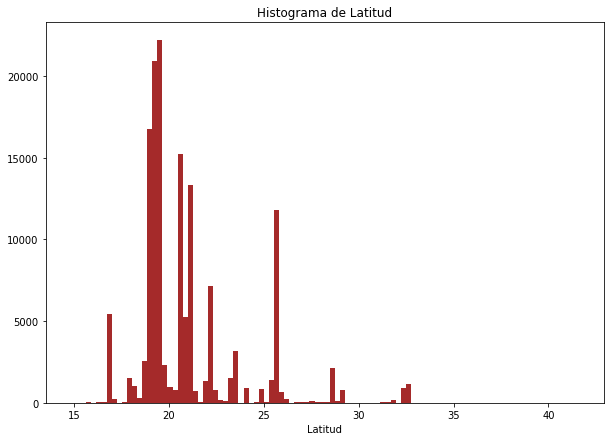

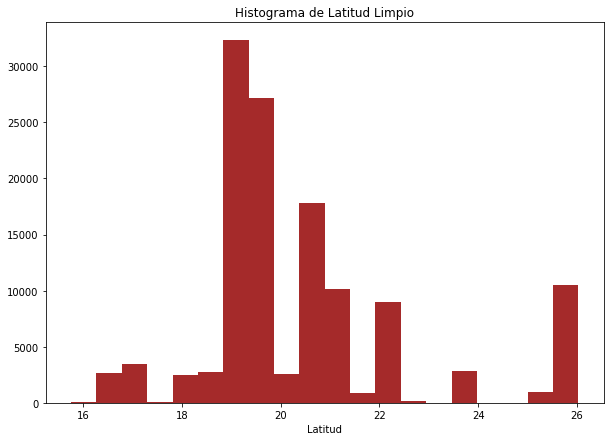

In [157]:
# datos originales
Histograma(df['c_lat'], bins = 100, xlabel = 'Latitud', titulo = 'Histograma de Latitud',
           color = 'brown', log = False, path = False)

# datos limpios
Histograma(df_clean['c_lat'], bins = 20, xlabel = 'Latitud', titulo = 'Histograma de Latitud Limpio',
           color = 'brown', log = False, path = 'graficas/hist_lat_limpio.png')

_Observamos un gran cambioe en el rango de latitudes, esto nos indica que todos los registros con latitud mayor a 26 eran erroneos o estaban muy alejados de los datos normales._

### Longitud

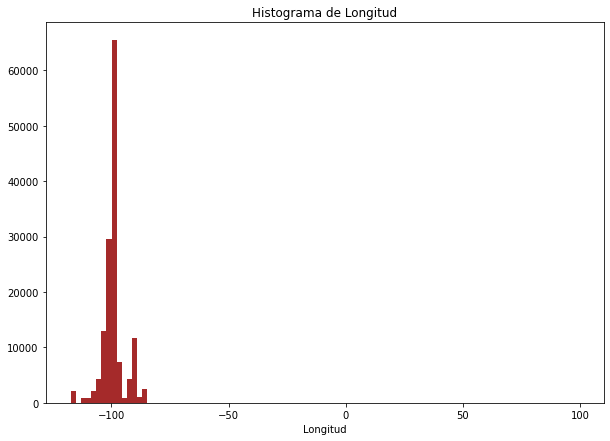

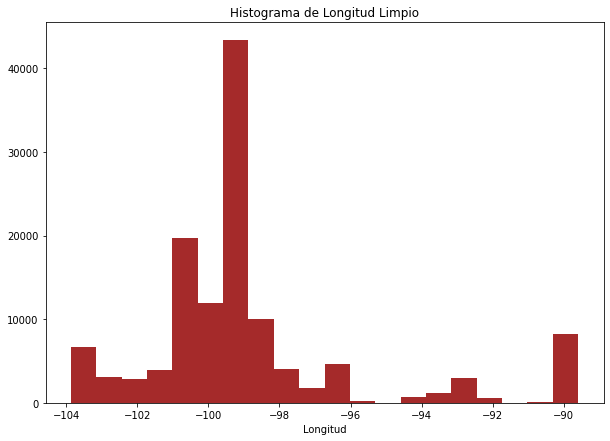

In [158]:
# Datos originales
Histograma(df['c_lon'], bins = 100, xlabel = 'Longitud', titulo = 'Histograma de Longitud',
           color = 'brown', log = False, path = False)

# Datos limpios
Histograma(df_clean['c_lon'], bins = 20, xlabel = 'Longitud', titulo = 'Histograma de Longitud Limpio',
           color = 'brown', log = False, path = 'graficas/hist_long_limpio.png')

_Vemos una concentración de los datos en un rango de -104 a -90. En los datos originales el rango llegaba a 100 lo que indica un gran error en los datos_

### Estados

In [159]:
#conteo de estados limpio
conteo_estados_c = df_clean['v_estado'].value_counts()

In [160]:
# datos originales
Bar(conteo_estados.index, conteo_estados.values, 'Número de Publicaciones por Estado',
    False, 'green')

#datos limpios
Bar(conteo_estados_c.index, conteo_estados_c.values, 'Número de Publicaciones por Estado Limpios',
    'graficas/pub_por_est_limpio.png', 'green')

_Vemos una reducción notable en las publicaciones de los estados, exiten cambios de posiciones en los estados y vemos la desaparición de los registros de Michoacan, ya que únicamente eran cuatro publicaciones._

In [161]:
# precio limpio por estado
price_c = pd.pivot_table(df_clean, values = 'c_price_aprox_local_currency', index = 'v_estado', aggfunc = np.median)
price_c.sort_values('c_price_aprox_local_currency', ascending=False, inplace = True)
price_c = pd.Series(index = price_c.index, data = [x[0] for x in price_c.values])

In [162]:
# datos originales
Bar(price.index, price.values, 'Mediana de Precios por Estado', False, 'green')

#datos limpios
Bar(price_c.index, price_c.values, 'Mediana de Precios por Estado Limpio',
    'graficas/median_prec_est_limpio.png', 'green')

_Vemos un cambio radical en los precios de Nayarit, esto puede ser debido a la baja cantidad de datos que existen en este estado, de igual manera los precios en los estados con las ciudades más importantes en el país redujeron el precio._

### Municipios

In [163]:
# publicaciones de municipios limpios
conteo_municipios_c = df_clean['v_municipio'].value_counts()[0:10]

In [164]:
# datos originales
Bar(conteo_municipios.index, conteo_municipios.values, '10 Municipios con mas Publicaciones', 
    False, 'orange')

#datos limpios
Bar(conteo_municipios_c.index, conteo_municipios_c.values, '10 Municipios con mas Publicaciones Limpio', 
    'graficas/mun_public_limpio.png', 'orange')

_La mayoría de la ciudades con mayor número de publicaciones se conservan, aunque el orden cambia con respecto a los datos originales. Tambien observamos que los datos de Merida tambien se encuentran dentro de la tabla limpia aunque este sea un municipio que se encuentra en los extremos del país._

In [165]:
# precio de mediana en municipios limpio
price_m_c = pd.pivot_table(df_clean, values = 'c_price_aprox_local_currency', index = 'v_municipio', aggfunc = np.median)
price_m_c.sort_values('c_price_aprox_local_currency', ascending=False, inplace = True)
price_m_c = pd.Series(index = price_m_c.index, data = [x[0] for x in price_m_c.values])[0:10]

In [166]:
# datos originales
Bar(price_m.index, price_m.values, 'Mediana de Precios por Municipio', False, 'orange')

#datos Limpios
Bar(price_m_c.index, price_m_c.values, 'Mediana de Precios por Municipio Limpio',
    'graficas/prec_muni_limpio.png', 'orange')

_Vemos un cambio radical en los municipios con media más alta, observamos un cambio en el rango de precios acorde al país, ya que pasamos de un rango superior de 60 millones de pesos a 8 millones de pesos._

### Venta vs Renta

In [167]:
# numero de publicaciones por operación
operation_c = df_clean['v_operation'].value_counts()

In [168]:
# datos originales
Bar(operation.index, operation.values, 'Publicaciones por Operacion',
    False, ['#37C9FF', '#aaeffa'])

# Datos limpios
Bar(operation_c.index, operation_c.values, 'Publicaciones por Operacion Limpio',
    'graficas/venta_renta_limpio.png', ['#37C9FF', '#aaeffa'])

_Vemos una mayor reducción en las publicaciones de venta que de renta al limpiar la tabla de datos. Pasaron de 150000 a 100000 publicaciones._

### Precios Venta Limpio

In [169]:
# distribución de precios de venta limpios
precio_venta_c = df_clean[df_clean['v_operation'] == 'sell']['c_price_aprox_local_currency']

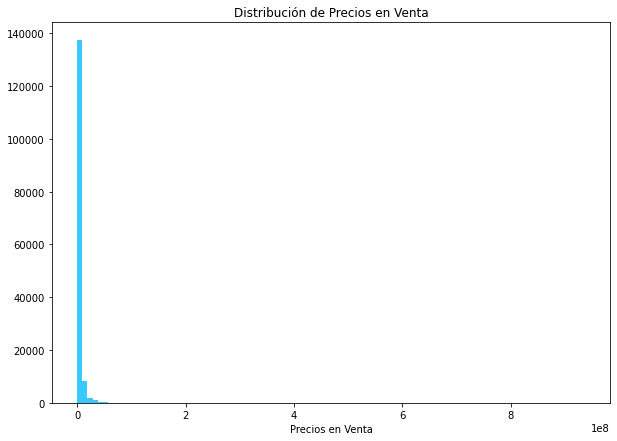

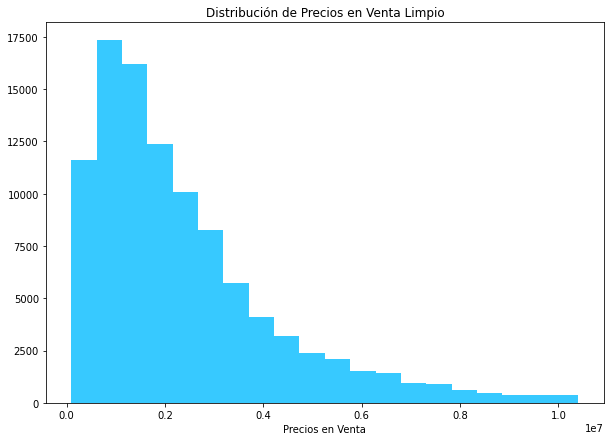

In [170]:
# datos originales
Histograma(data = precio_venta.values, bins = 100, log = False, 
           titulo = 'Distribución de Precios en Venta', path = False, 
           color = '#37C9FF', xlabel = 'Precios en Venta')

#datos limpios
Histograma(data = precio_venta_c.values, bins = 20, log = False, 
           titulo = 'Distribución de Precios en Venta Limpio', path = 'graficas/dist_prec_limpio.png', 
           color = '#37C9FF', xlabel = 'Precios en Venta')

_Observamos un cambio favorable en el rango de precios ya que van desde menos de un millón de pesos hasta los 10 millones. En los datos originales el rango de precios va desde 0 hasta los 900 millones de pesos._

### Precio Renta Limpio

In [171]:
# distribución de precios de renta limpio
precio_renta_c = df_clean[df_clean['v_operation'] == 'rent']['c_price_aprox_local_currency']

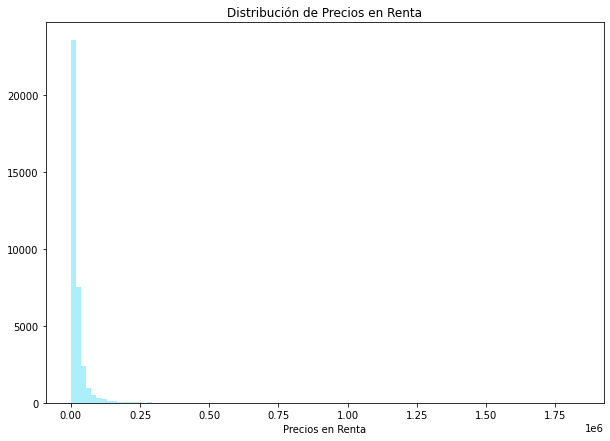

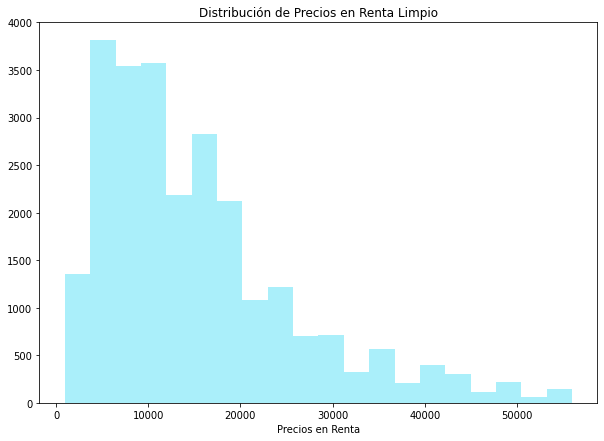

In [172]:
# datos originales
Histograma(data = precio_renta.values, bins = 100, log = False, 
           titulo = 'Distribución de Precios en Renta', path = False, 
           color = '#aaeffa', xlabel = 'Precios en Renta')

# datos originales
Histograma(data = precio_renta_c.values, bins = 20, log = False, 
           titulo = 'Distribución de Precios en Renta Limpio', path = 'graficas/dist_prec_renta_limpio.png', 
           color = '#aaeffa', xlabel = 'Precios en Renta')

_De igual manera vemos un gran cambio en el rango de precios en rentas, ya que el original va desde los 0 pesos hasta los 1.75 millones de pesos. El nuevo rango tiene una mayor concentración de precios de renta entre los 4 mil a los 10 mil pesos._

### Tipo de inmueble Limpio

In [173]:
casa_c = pd.pivot_table(df_clean[df_clean['v_property_type'] == 'house'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

depa_c = pd.pivot_table(df_clean[df_clean['v_property_type'] == 'apartment'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

tienda_c = pd.pivot_table(df_clean[df_clean['v_property_type'] == 'store'], values = ['c_price_aprox_local_currency'],
              index = 'v_estado', aggfunc = np.median).sort_values('c_price_aprox_local_currency', ascending=False)

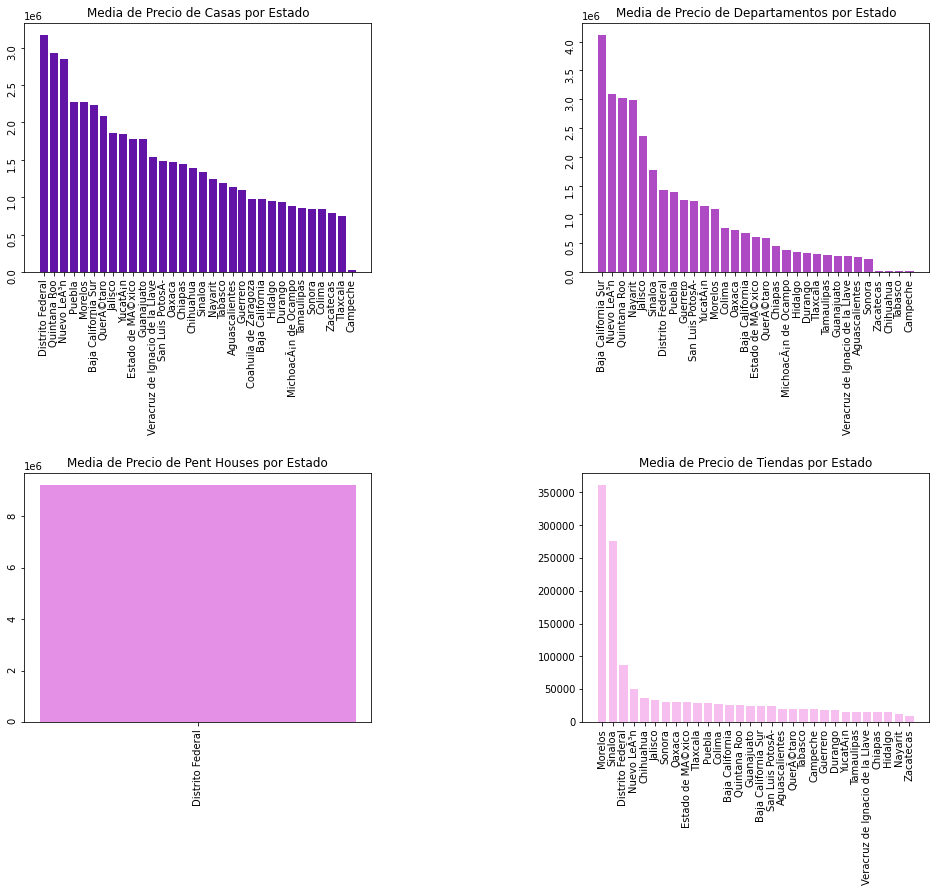

In [174]:
fig, ax = plt.subplots(2,2, figsize=(18, 15))
fig.tight_layout(pad=18.0)

# Casas
ax[0][0].bar(casa.index, casa.c_price_aprox_local_currency, color = '#6214a7')
ax[0][0].set_title('Media de Precio de Casas por Estado')
ax[0][0].tick_params(labelrotation=90)

#  Departamentos
ax[0][1].bar(depa.index, depa.c_price_aprox_local_currency, color = '#ae4ac4')
ax[0][1].set_title('Media de Precio de Departamentos por Estado')
ax[0][1].tick_params(labelrotation=90)

# Pent House
ax[1][0].bar(ph.index, ph.c_price_aprox_local_currency, color = '#e390e6')
ax[1][0].set_title('Media de Precio de Pent Houses por Estado')
ax[1][0].tick_params(labelrotation=90)

# Tienda
ax[1][1].bar(tienda.index, tienda.c_price_aprox_local_currency, color = '#f7bff0')
ax[1][1].set_title('Media de Precio de Tiendas por Estado')
plt.xticks(rotation = 90)

plt.show()

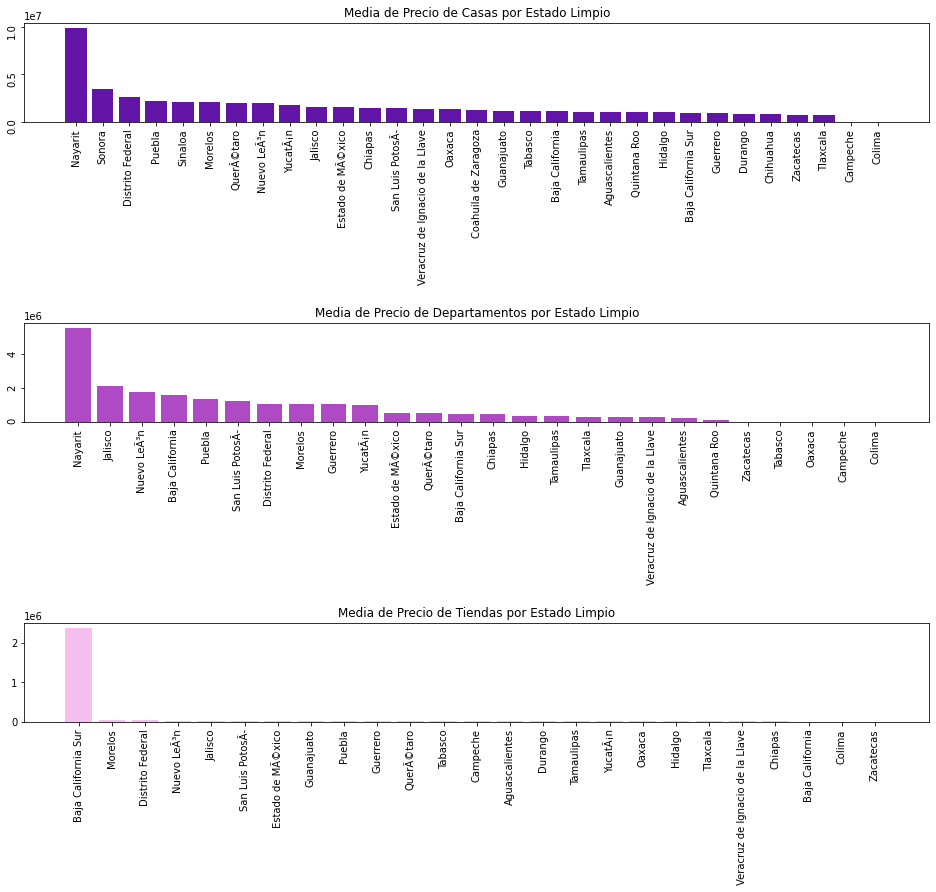

In [175]:
fig, ax = plt.subplots(3,1, figsize=(18, 15))
fig.tight_layout(pad=18.0)

# Casas
ax[0].bar(casa_c.index, casa_c.c_price_aprox_local_currency, color = '#6214a7')
ax[0].set_title('Media de Precio de Casas por Estado Limpio')
ax[0].tick_params(labelrotation=90)

#  Departamentos
ax[1].bar(depa_c.index, depa_c.c_price_aprox_local_currency, color = '#ae4ac4')
ax[1].set_title('Media de Precio de Departamentos por Estado Limpio')
ax[1].tick_params(labelrotation=90)

# Tienda
ax[2].bar(tienda_c.index, tienda_c.c_price_aprox_local_currency, color = '#f7bff0')
ax[2].set_title('Media de Precio de Tiendas por Estado Limpio')
plt.xticks(rotation = 90)

plt.savefig('graficas/dist_tipo_limpio.png', dpi = 200)
plt.show()

_Vemos un cambio en el rango de precios en los tres tipos de inmueble, de igual manera observamos que la mediana de precios en Nayarit es muy alta, esto debido a la poca cantidad de datos con los que se cuenta. Vemos que los Pent House se eliminaron ya que se consideran datos extremos al sólo existir registros en la Ciudad de México._

### d_created_on to Datetime

In [176]:
# agrupación por mes
mes_publ_c = df_clean.set_index('d_created_on').groupby(by=[df_clean.set_index('d_created_on').index.month]).agg('count')['v_operation']

In [177]:
# grafica dos lineas
fig = go.Figure()
# grafica original
fig.add_trace(go.Scatter(x=mes_label, y=mes_publ.values,
                    mode='lines+markers',
                    name='Datos Originales'))
# grafica limpia
fig.add_trace(go.Scatter(x=mes_label, y=mes_publ_c.values,
                    mode='lines+markers',
                    name='Datos Limpios'))
# titulo
fig.update_layout(title_text='Conteo de Publicaciones por Mes')
# guardar
fig.write_image('graficas/conteo_mes_comparacion.png', scale = 1.5)
fig.show()

_Observamos un comportamiento igual a la serie original, pero desplazado algunas unidades hacia abajo, esto debido a la eliminación de los precios más altos en las tablas de datos._

### Agrupación por Día

In [178]:
# publicaciones por día limpio
dia_publ_c = df_clean.set_index('d_created_on').groupby(by=[df_clean.set_index('d_created_on').index.dayofweek]).agg('count')['v_operation']

In [179]:
# grafica dos lineas
fig = go.Figure()
# primera grafica
fig.add_trace(go.Scatter(x=dia_label, y=dia_publ.values,
                    mode='lines+markers',
                    name='Datos Originales'))
#segunda grafica
fig.add_trace(go.Scatter(x=dia_label, y=dia_publ_c.values,
                    mode='lines+markers',
                    name='Datos Limpios'))
#titulo
fig.update_layout(title_text='Conteo de Publicaciones por Día')
#salvar
fig.write_image('graficas/conteo_dia_comparacion.png', scale = 1.5)
fig.show()

_De igual manera observamos un comportamiento parecido entre las dos gŕaficas pero desplazado. observando que las publicaciones entre lunes y martes no tienen un cambio tan brusco como se ve en los datos originales e igualmente el día domingo no contiene una gran diferencia entre las publicaciones originales y limpias._

### Mediana en Precio por Mes

In [180]:
# mediana de precios por mes limpio
mes_price_c = df_clean.set_index('d_created_on').groupby(by=[df_clean.set_index('d_created_on').index.month]).agg('median')['c_price_aprox_local_currency']

In [181]:
# grafica dos lineas
fig = go.Figure()
# primera grafica
fig.add_trace(go.Scatter(x=mes_label, y=mes_price.values,
                    mode='lines+markers',
                    name='Datos Originales'))
#segunda grafica
fig.add_trace(go.Scatter(x=mes_label, y=mes_price_c.values,
                    mode='lines+markers',
                    name='Datos Limpios'))
#titulo
fig.update_layout(title_text='Mediana en Precio por Mes')
#salvar
fig.write_image('graficas/precio_mes_comparacion.png', scale = 1.5)
fig.show()

_Notamos que en los datos originales no se puede apreciar de buena manera la reducción de precios entre los meses de abril y octubre, pero con los datos limpios notamos que los precios de los imuebles bajan en estos meses teniendo un mínimo en el mes de octubre._

### Superficie Limpio

In [182]:
# superficie por estado limpio
sup_est_c = df_clean.groupby(by = 'v_estado').agg('median')['c_surface_covered_in_m2'].sort_values(ascending=False)

In [183]:
# datos originales
Bar(sup_est.index, sup_est.values, 'Mediana de Superficien por Estado en m2', False, '#dd5e00')

# Datos limpios
Bar(sup_est_c.index, sup_est_c.values, 'Mediana de Superficien por Estado en m2 Limpio',
    'graficas/sup_est_limpio.png', '#dd5e00')

_Con los datos limpios podemos notar de mejor manera como los inmuebles en los estados más grandes tienen mayor superficie que los estados más chicos y más conglomerados. Sonora el segundo estado más grande de todo México y la Ciudad de México el estado más chico de la republica._

### Superficie Por Tipo de Inmueble Limpio

In [184]:
# Superficie Por Tipo de Inmueble Limpio
sup_type_c = df_clean.groupby(by = ['v_property_type']).agg('median')['c_surface_covered_in_m2'].sort_values(ascending=False)

In [185]:
# datos originales
Bar(sup_type.index, sup_type.values, 'Mediana de Superficien por Tipo de Inmueble en m2',
    False, ['#6214a7', '#ae4ac4', '#e390e6', '#f7bff0'])

# datos limpios
Bar(sup_type_c.index, sup_type_c.values, 'Mediana de Superficien por Tipo de Inmueble en m2 Limpio',
    'graficas/sup_tipo_inmu_limpio.png', ['#ae4ac4', '#e390e6', '#f7bff0'])

_Vemos que se elimina los Pent House e incrementan la superficie en cada un de los tipos de inmueble, de igual manera podemos notar que los apartamentos tienen una mayor superficie a comparación de las tiendas, esto es más común en el mercado inmobiliario._

## Feature Engineering

In [186]:
# creación de nuevo data frame
df_new = df_clean.copy(deep = True)

### d_created_on

In [187]:


# división de años
df_new['v_anio'] = df_new['d_created_on'].apply(lambda x: x.year)

# división por meses
df_new['v_mes'] = df_new['d_created_on'].apply(lambda x: x.month)

# diccionario día de la semana
day_week = dict(zip(np.arange(0,7), ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']))

# división dia semana
df_new['v_dia_semama'] = df_new['d_created_on'].apply(lambda x: day_week[x.weekday()])

In [188]:
# get dummies de las variables creadas eliminando la primera variable dummy
# años
df_new = pd.get_dummies(df_new, columns = ['v_anio'], drop_first = True)
# meses
df_new = pd.get_dummies(df_new, columns = ['v_mes'], drop_first = True)
# dia semana
df_new = pd.get_dummies(df_new, columns = ['v_dia_semama'], drop_first = True)

In [189]:
df_new.iloc[0:5, 16:]

v_anio_2015  v_anio_2016  v_mes_2  v_mes_3  v_mes_4  v_mes_5  v_mes_6  \
0            0            0        0        0        0        0        0   
1            0            0        0        0        0        0        0   
2            0            0        0        0        0        0        0   
3            0            0        0        0        0        0        0   
4            0            0        0        0        0        0        0   

   v_mes_7  v_mes_8  v_mes_9  v_mes_10  v_mes_11  v_mes_12  \
0        0        0        0         0         0         0   
1        0        0        0         0         0         0   
2        0        0        0         0         0         0   
3        0        0        0         0         0         0   
4        0        0        0         0         0         0   

   v_dia_semama_Jueves  v_dia_semama_Lunes  v_dia_semama_Martes  \
0                    1                   0                    0   
1                    1                   0                    0   
2                    1                   0                    0   
3                    1                   0                    0   
4                    1                   0                    0   

   v_dia_semama_Miercoles  v_dia_semama_Sábado  v_dia_semama_Viernes  
0                       0                    0                     0  
1                       0                    0                     0  
2                       0                    0                     0  
3                       0                    0                     0  
4                       0                    0                     0

_Se crean variables dummies para fecha, con división de años, meses y día de la semana. AL crear estas variables dummy se elimina la primera variable categórica para no tener multicolinealidad con las demás variables creadas._

### v_operation

In [190]:
# creación de variable dummy para v_operation
df_new = pd.get_dummies(df_new, columns = ['v_operation'], drop_first = True)

In [191]:
df_new.iloc[0:5, -2:]

v_dia_semama_Viernes  v_operation_sell
0                     0                 1
1                     0                 1
2                     0                 1
3                     0                 1
4                     0                 1

_Se crea una variable dummy para la operación al no ser una variable ordinal, de igual manera se elimina la columna de v_operation_rent para eliminar la relación entre las variables_

### v_property_type

In [192]:
# creación de variable dummy para v_property_type
df_new = pd.get_dummies(df_new, columns = ['v_property_type'], drop_first = True)

#nueva tabla
df_new.iloc[0:5, -2:]

v_property_type_house  v_property_type_store
0                      1                      0
1                      1                      0
2                      0                      0
3                      1                      0
4                      1                      0

_Eliminamos la variable v_property_type y obtenemos dos nuevas variables las cuales indican si el tipo de inmueble es casa o tienda, si ambas indican 0 el inmueble es un departamento._

### c_lat y c_lon

In [193]:
# número de publicaciones por latitud y longitud
# llaves geográficas
llaves = [str(df_new['c_lat'][index]) + ',' + str(df_new['c_lon'][index]) for index in df_new.index]
llaves = list(set(llaves))
# diccionario
geo_count = dict(zip(llaves, np.zeros(len(llaves))))

# iteración por registro
for index in df_new.index:
    # llave conjunta
    nombre = str(df_new['c_lat'][index]) + ',' + str(df_new['c_lon'][index])
    # suma de publicaciones
    geo_count[nombre] += 1

In [194]:
# agregar conteo de latitudes y longitudes
conteo_lat_lon = []
# iteración por registro
for index in df_new.index:
    # llave conjunta
    nombre = str(df_new['c_lat'][index]) + ',' + str(df_new['c_lon'][index])
    # registros
    conteo_lat_lon.append(geo_count[nombre])

# union a la tabla
df_new['v_conteo_geo'] = conteo_lat_lon

In [195]:
df_new.iloc[0:5, -2:]

v_property_type_store  v_conteo_geo
0                      0          10.0
1                      0           1.0
2                      0          10.0
3                      0          10.0
4                      0          10.0

_Se crea una nueva variable con el conteo de publicaciones por latitud y longitud._

_Las variables relacionadas con el precio no serán modificadas ya que estas se utilizaran como variable objetivo y esto podría sesgar el entrenamiento correcto del modelo._

### t_title

In [196]:
# Count Vectorizer para las 10 palabras más repetidas
vect = CountVectorizer(max_features = 10)
array = vect.fit_transform(df_new['t_title'])

#creación dataframe
data_count_vectorizer_t = pd.DataFrame(array.toarray(), columns = vect.get_feature_names())
# cambio de nombre de variables
data_count_vectorizer_t.columns = ['title_' + x for x in data_count_vectorizer_t.columns]
data_count_vectorizer_t.head()

title_casa  title_centro  title_departamento  title_fracc  title_local  \
0           1             0                   0            0            0   
1           1             0                   0            0            0   
2           0             0                   1            0            0   
3           1             0                   0            0            0   
4           1             0                   0            0            0   

   title_lomas  title_renta  title_residencial  title_san  title_venta  
0            0            0                  0          0            1  
1            0            0                  0          0            0  
2            0            0                  0          0            1  
3            0            0                  1          0            1  
4            0            0                  0          0            1

In [197]:
# unión al data set
df_new = pd.concat([df_new, data_count_vectorizer_t], axis = 1)
# eliminiar t_title
df_new.drop('t_title', axis = 1, inplace = True)

_Se agregaron las 10 palabras más repetidas en los títulosy su número de apriciones en el título, se eliminó la variable t_title. Se realizará lo mismo para la descripción._

### t_description

In [198]:
# Count Vectorizer para las 10 palabras más repetidas
vect = CountVectorizer(max_features = 10)
array = vect.fit_transform(df_new['t_description'])

#creación dataframe
data_count_vectorizer_d = pd.DataFrame(array.toarray(), columns = vect.get_feature_names())
# cambio de nombre de variables
data_count_vectorizer_d.columns = ['descr_' + x for x in data_count_vectorizer_d.columns]
data_count_vectorizer_d.head()

descr_baao  descr_br  descr_casa  descr_cocina  descr_comedor  descr_id  \
0           2         0           0             1              1         0   
1           0         0           1             0              0         0   
2           1         0           0             1              1         0   
3           1         0           0             1              1         0   
4           1         0           0             1              1         0   

   descr_nocnok  descr_recamaras  descr_sala  descr_sistema  
0             0                2           1              0  
1             0                1           0              0  
2             0                1           1              0  
3             0                0           1              0  
4             0                1           1              0

In [199]:
# unión al data set
df_new = pd.concat([df_new, data_count_vectorizer_d], axis = 1)
# eliminiar t_title
df_new.drop('t_description', axis = 1, inplace = True)

_Se agregaron las 10 palabras más repetidas en las descripciones y su número de apriciones en ellas, se eliminó la variable t_description._

### v_estado

In [200]:
# variables dummy estado
df_new = pd.get_dummies(df_new, columns = ['v_estado'], drop_first = True)

In [201]:
df_new.iloc[0:5, -5:]

v_estado_Tamaulipas  v_estado_Tlaxcala  \
0                    0                  0   
1                    0                  0   
2                    0                  0   
3                    0                  0   
4                    0                  0   

   v_estado_Veracruz de Ignacio de la Llave  v_estado_YucatÃ¡n  \
0                                         1                  0   
1                                         1                  0   
2                                         1                  0   
3                                         1                  0   
4                                         1                  0   

   v_estado_Zacatecas  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

_Se crean variables dummy para cada uno de los estados, esto podrá reducirse en la sección de reducción de variables._

### v_municipio

In [202]:
# variables dummy municipio
df_new = pd.get_dummies(df_new, columns = ['v_municipio'], drop_first = True)
df_new.iloc[0:5, -5:]

v_municipio_Zihuatanejo de Azueta  v_municipio_ZimapÃ¡n  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
4                                  0                     0   

   v_municipio_Zinacantepec  v_municipio_Zumpango  \
0                         0                     0   
1                         0                     0   
2                         0                     0   
3                         0                     0   
4                         0                     0   

   v_municipio_Ãlvaro ObregÃ³n  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0

_Se han creado una gran cantidad de variables gracias a las variables de estado y municipio, muchas de estas serán reducidas en la siguiente sección._

## Reducción de Dimensiones

In [203]:
# creación de nuevo data set
df_red = df_new.copy(deep = True)

### Selección de Características

_Las variables v_currency, t_properati_url al contener valores únicos o tener información en texto que no servirá para la parte de modelacíon se eliminarán._

_Las variables c_price_aprox_local_currency, c_price_aprox_usd, c_price_per_m2 serán eliminadas ya que estás fueron calculadas con la información de precio. Esto no serviría para el modelo ya que tendríamos el precio._

In [204]:
df_red.drop(['v_currency', 't_properati_url'], axis = 1, inplace = True)
df_red.shape

(125684, 531)

In [205]:
df_red.drop(['c_price_aprox_local_currency', 'c_price_aprox_usd', 'c_price_per_m2'], axis = 1, inplace = True)
df_red.shape

(125684, 528)

_Al no tener variables con registros nulo no es necesario ocupar el método de Valor Perdido_

### Baja Varianza

In [206]:
#varianza de variables
varianza_red = df_red.var()
# índice de varianza
var_index = varianza_red[varianza_red < .01].index

In [207]:
len(var_index)

437

_Se utilizarán distitnos métodos y se eliminarán las variables que se obtengan en dos métodos distintos._

### Correlación con el objetivo

_Se usará primero este método para poder eliminar directamente las variables que no darán información para predecir el target, después se realizará un análisis de correlación para conocer que variables están altamente relacionadas entre si._

In [208]:
# correlación con precio
corr_price = np.abs(df_red.corr()['c_price'])

# variables con baja correlación
corr_baja_price = corr_price[corr_price < 0.1].index

_Para realizar el Análisis de Multicolinealidad se eliminarán las variables que se encuentren en correlación baja y baja varianza._

In [211]:
df_red.drop(list(corr_baja_price & var_index), axis = 1, inplace = True)

### Multicolinealidad

In [218]:
# sin target ni fechas
df_vif = df_red.iloc[:, 1:].loc[:, df_red.iloc[:, 1:].columns != 'c_price'].copy(deep = True)

# VIF por variable
VIF = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

In [220]:
#serie de VIF
vif_s = pd.Series(index = df_vif.columns, data = VIF)
# index_vif
index_vif = vif_s[vif_s > 10].index

### Indices Repetidos

In [234]:
# variables repetidas en dos listas combinaciones
a = list(set(var_index & corr_baja_price))
b = list(set(var_index & index_vif))
c = list(set(corr_baja_price & index_vif))

# todas las variables
a.extend(b)
a.extend(c)

# variables única
lista_final = list(set(a))

#lista a eliminar
lista_eliminar = list(df_red.columns & lista_final)

In [236]:
df_red.drop(lista_eliminar, axis = 1, inplace = True)
df_red.shape

(125684, 74)

### Alta correlación entre variables

In [271]:
#variable auxiliar para eliminar la fecha y el precio
df_red3 = df_red.iloc[:, 2:].copy(deep = True)
#correlación de los datos
corr = df_red3.corr()

In [272]:
# lista para agregar variables a eliminar por alta correlación
aux_eliminadas = []
# iteración por dataframe de correlación
for index in corr.index:
    # verificar que el índice no este en variable eliminadas
    if index not in aux_eliminadas:
        # crear una lista de variables con correlación mayor a .56
        alta = list(corr[index][np.abs(corr[index]) >= 0.56].index)
        # se elimina la propia variable ya que contiene correlación 0
        alta.remove(index)
        #se agrega a la lista de variables a eliminar
        aux_eliminadas.extend(alta)

In [274]:
# eliminar variables en el data set df_re
df_red.drop(aux_eliminadas, axis = 1, inplace = True)

In [295]:
df_red.head()

d_created_on    c_price  c_surface_covered_in_m2  v_mes_2  v_mes_3  v_mes_4  \
0   2014-01-02   750000.0                     90.0        0        0        0   
1   2014-01-02   140000.0                    174.5        0        0        0   
2   2014-01-02   440000.0                     60.0        0        0        0   
3   2014-01-02  2950000.0                    177.0        0        0        0   
4   2014-01-02   750000.0                     70.0        0        0        0   

   v_mes_5  v_mes_6  v_mes_7  v_mes_9  ...  v_municipio_Cuautla  \
0        0        0        0        0  ...                    0   
1        0        0        0        0  ...                    0   
2        0        0        0        0  ...                    0   
3        0        0        0        0  ...                    0   
4        0        0        0        0  ...                    0   

   v_municipio_Gustavo A. Madero  v_municipio_Iztapalapa  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   

   v_municipio_Jiquipilas  v_municipio_Miguel Hidalgo  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   v_municipio_Naucalpan de JuÃ¡rez  v_municipio_San Pedro Garza GarcÃ­a  \
0                                 0                                    0   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   v_municipio_Toluca  v_municipio_Tuxtla GutiÃ©rrez  \
0                   0                              0   
1                   0                              0   
2                   0                              0   
3                   0                              0   
4                   0                              0   

   v_municipio_Ãlvaro ObregÃ³n  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 59 columns]

In [296]:
df_red.columns

Index(['d_created_on', 'c_price', 'c_surface_covered_in_m2', 'v_mes_2',
       'v_mes_3', 'v_mes_4', 'v_mes_5', 'v_mes_6', 'v_mes_7', 'v_mes_9',
       'v_mes_11', 'v_mes_12', 'v_dia_semama_Jueves', 'v_dia_semama_Lunes',
       'v_dia_semama_Martes', 'v_dia_semama_Miercoles', 'v_dia_semama_Sábado',
       'v_dia_semama_Viernes', 'v_operation_sell', 'v_property_type_house',
       'v_property_type_store', 'v_conteo_geo', 'title_centro', 'title_fracc',
       'title_lomas', 'title_residencial', 'title_san', 'descr_baao',
       'descr_br', 'descr_casa', 'descr_cocina', 'descr_recamaras',
       'v_estado_Distrito Federal', 'v_estado_Estado de MÃ©xico',
       'v_estado_Guanajuato', 'v_estado_Guerrero', 'v_estado_Hidalgo',
       'v_estado_Jalisco', 'v_estado_Morelos', 'v_estado_Nuevo LeÃ³n',
       'v_estado_Puebla', 'v_estado_QuerÃ©taro', 'v_estado_Tabasco',
       'v_estado_Tamaulipas', 'v_municipio_AtizapÃ¡n de Zaragoza',
       'v_municipio_Benito JuÃ¡rez', 'v_municipio_Corregidora',

## Reducción de Dimensionalidad

### PCA

In [298]:
df_pca = df_red.copy(deep = True)

In [301]:
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:, 2:], df_pca.iloc[:, 1], test_size = 0.20)

In [328]:
pca = PCA(.95)
pca.fit(X_train, y_train)

PCA(n_components=0.95)